In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib as plt

file0 = glob.glob('/home/nbuser/train/c0/*.jpg')
file1 = glob.glob('/home/nbuser/train/c1/*.jpg')
file2 = glob.glob('/home/nbuser/train/c2/*.jpg')
file3 = glob.glob('/home/nbuser/train/c3/*.jpg')
file4 = glob.glob('/home/nbuser/train/c4/*.jpg')
file5 = glob.glob('/home/nbuser/train/c5/*.jpg')
file6 = glob.glob('/home/nbuser/train/c6/*.jpg')
file7 = glob.glob('/home/nbuser/train/c7/*.jpg')
file8 = glob.glob('/home/nbuser/train/c8/*.jpg')
file9 = glob.glob('/home/nbuser/train/c9/*.jpg')

folders = [file0, file1, file2, file3, file4, file5, file6, file7, file8,file9]
data = []
count = 0
for f in folders:
    print("File " + str(count))
    count += 1
    files = f
    for f1 in files:
        img = cv2.imread(f1,0)
        edges = cv2.Canny(img, 50,100)
        rs = cv2.resize(edges, (int(edges.shape[1]/4), int(edges.shape[0]/4)), interpolation = cv2.INTER_AREA)
        
        data.append(rs)
    
X = np.asarray(data)
X_train = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1).astype( 'float32' )
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )

File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9


In [2]:
from keras.utils import to_categorical
a0 = np.empty(len(file0))
a0.fill(0)
a1 = np.empty(len(file1))
a1.fill(1)
a2 = np.empty(len(file2))
a2.fill(2)
a3 = np.empty(len(file3))
a3.fill(3)
a4 = np.empty(len(file4))
a4.fill(4)
a5 = np.empty(len(file5))
a5.fill(5)
a6 = np.empty(len(file6))
a6.fill(6)
a7 = np.empty(len(file7))
a7.fill(7)
a8 = np.empty(len(file8))
a8.fill(8)
a9 = np.empty(len(file9))
a9.fill(9)

y = np.concatenate([a0, a1, a2, a3, a4, a5, a6, a7, a8, a9])
y = to_categorical(y)
num_classes = y.shape[1]
X_train = X_train/255

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=42)

Train on 17939 samples, validate on 4485 samples
Epoch 1/30
 - 46s - loss: 1.3845 - acc: 0.6144 - val_loss: 0.4558 - val_acc: 0.9231
Epoch 2/30
 - 42s - loss: 0.6303 - acc: 0.9324 - val_loss: 0.2721 - val_acc: 0.9819
Epoch 3/30
 - 42s - loss: 0.4134 - acc: 0.9731 - val_loss: 0.2207 - val_acc: 0.9911
Epoch 4/30
 - 42s - loss: 0.3059 - acc: 0.9870 - val_loss: 0.1569 - val_acc: 0.9935
Epoch 5/30
 - 42s - loss: 0.2415 - acc: 0.9915 - val_loss: 0.1353 - val_acc: 0.9951
Epoch 6/30
 - 42s - loss: 0.1946 - acc: 0.9950 - val_loss: 0.1270 - val_acc: 0.9964
Epoch 7/30
 - 42s - loss: 0.1598 - acc: 0.9969 - val_loss: 0.1086 - val_acc: 0.9973
Epoch 8/30
 - 42s - loss: 0.1355 - acc: 0.9976 - val_loss: 0.0806 - val_acc: 0.9971
Epoch 9/30
 - 42s - loss: 0.1127 - acc: 0.9984 - val_loss: 0.0769 - val_acc: 0.9978
Epoch 10/30
 - 42s - loss: 0.0998 - acc: 0.9982 - val_loss: 0.0625 - val_acc: 0.9978
Epoch 11/30
 - 42s - loss: 0.0849 - acc: 0.9987 - val_loss: 0.0550 - val_acc: 0.9975
Epoch 12/30
 - 42s - loss

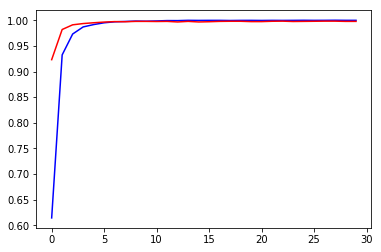

In [6]:
import numpy

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

def BN_model():

    model = Sequential()
    model.add(Conv2D(16, 3, input_shape=(120, 160, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(16, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    #model.add(Conv2D(16, 3))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# build the model
model = BN_model()

# Fit the model
log = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log.history['acc'],'b') 
plt.plot(log.history['val_acc'],'r')
plt.show()

In [17]:
test_array = []
image_label = []
file_test = glob.glob('/home/nbuser/test/*.jpg')
count = 0
for f1 in file_test:
        print("File " + str(count)),
        count += 1
        
        img = cv2.imread(f1,0)
        edges = cv2.Canny(img, 50,100)
        rs = cv2.resize(edges, (int(edges.shape[1]/4), int(edges.shape[0]/4)), interpolation = cv2.INTER_AREA)
        test_array.append(rs)
        image_label.append(os.path.join(f1))
        

test_X = np.asarray(test_array)



File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9
File 10
File 11
File 12
File 13
File 14
File 15
File 16
File 17
File 18
File 19
File 20
File 21
File 22
File 23
File 24
File 25
File 26
File 27
File 28
File 29
File 30
File 31
File 32
File 33
File 34
File 35
File 36
File 37
File 38
File 39
File 40
File 41
File 42
File 43
File 44
File 45
File 46
File 47
File 48
File 49
File 50
File 51
File 52
File 53
File 54
File 55
File 56
File 57
File 58
File 59
File 60
File 61
File 62
File 63
File 64
File 65
File 66
File 67
File 68
File 69
File 70
File 71
File 72
File 73
File 74
File 75
File 76
File 77
File 78
File 79
File 80
File 81
File 82
File 83
File 84
File 85
File 86
File 87
File 88
File 89
File 90
File 91
File 92
File 93
File 94
File 95
File 96
File 97
File 98
File 99
File 100
File 101
File 102
File 103
File 104
File 105
File 106
File 107
File 108
File 109
File 110
File 111
File 112
File 113
File 114
File 115
File 116
File 117
File 118
File 119
File 120
File 121
File 122
Fil

File 923
File 924
File 925
File 926
File 927
File 928
File 929
File 930
File 931
File 932
File 933
File 934
File 935
File 936
File 937
File 938
File 939
File 940
File 941
File 942
File 943
File 944
File 945
File 946
File 947
File 948
File 949
File 950
File 951
File 952
File 953
File 954
File 955
File 956
File 957
File 958
File 959
File 960
File 961
File 962
File 963
File 964
File 965
File 966
File 967
File 968
File 969
File 970
File 971
File 972
File 973
File 974
File 975
File 976
File 977
File 978
File 979
File 980
File 981
File 982
File 983
File 984
File 985
File 986
File 987
File 988
File 989
File 990
File 991
File 992
File 993
File 994
File 995
File 996
File 997
File 998
File 999
File 1000
File 1001
File 1002
File 1003
File 1004
File 1005
File 1006
File 1007
File 1008
File 1009
File 1010
File 1011
File 1012
File 1013
File 1014
File 1015
File 1016
File 1017
File 1018
File 1019
File 1020
File 1021
File 1022
File 1023
File 1024
File 1025
File 1026
File 1027
File 1028
File 1029
File 10

File 1752
File 1753
File 1754
File 1755
File 1756
File 1757
File 1758
File 1759
File 1760
File 1761
File 1762
File 1763
File 1764
File 1765
File 1766
File 1767
File 1768
File 1769
File 1770
File 1771
File 1772
File 1773
File 1774
File 1775
File 1776
File 1777
File 1778
File 1779
File 1780
File 1781
File 1782
File 1783
File 1784
File 1785
File 1786
File 1787
File 1788
File 1789
File 1790
File 1791
File 1792
File 1793
File 1794
File 1795
File 1796
File 1797
File 1798
File 1799
File 1800
File 1801
File 1802
File 1803
File 1804
File 1805
File 1806
File 1807
File 1808
File 1809
File 1810
File 1811
File 1812
File 1813
File 1814
File 1815
File 1816
File 1817
File 1818
File 1819
File 1820
File 1821
File 1822
File 1823
File 1824
File 1825
File 1826
File 1827
File 1828
File 1829
File 1830
File 1831
File 1832
File 1833
File 1834
File 1835
File 1836
File 1837
File 1838
File 1839
File 1840
File 1841
File 1842
File 1843
File 1844
File 1845
File 1846
File 1847
File 1848
File 1849
File 1850
File 1851


File 2581
File 2582
File 2583
File 2584
File 2585
File 2586
File 2587
File 2588
File 2589
File 2590
File 2591
File 2592
File 2593
File 2594
File 2595
File 2596
File 2597
File 2598
File 2599
File 2600
File 2601
File 2602
File 2603
File 2604
File 2605
File 2606
File 2607
File 2608
File 2609
File 2610
File 2611
File 2612
File 2613
File 2614
File 2615
File 2616
File 2617
File 2618
File 2619
File 2620
File 2621
File 2622
File 2623
File 2624
File 2625
File 2626
File 2627
File 2628
File 2629
File 2630
File 2631
File 2632
File 2633
File 2634
File 2635
File 2636
File 2637
File 2638
File 2639
File 2640
File 2641
File 2642
File 2643
File 2644
File 2645
File 2646
File 2647
File 2648
File 2649
File 2650
File 2651
File 2652
File 2653
File 2654
File 2655
File 2656
File 2657
File 2658
File 2659
File 2660
File 2661
File 2662
File 2663
File 2664
File 2665
File 2666
File 2667
File 2668
File 2669
File 2670
File 2671
File 2672
File 2673
File 2674
File 2675
File 2676
File 2677
File 2678
File 2679
File 2680


File 3408
File 3409
File 3410
File 3411
File 3412
File 3413
File 3414
File 3415
File 3416
File 3417
File 3418
File 3419
File 3420
File 3421
File 3422
File 3423
File 3424
File 3425
File 3426
File 3427
File 3428
File 3429
File 3430
File 3431
File 3432
File 3433
File 3434
File 3435
File 3436
File 3437
File 3438
File 3439
File 3440
File 3441
File 3442
File 3443
File 3444
File 3445
File 3446
File 3447
File 3448
File 3449
File 3450
File 3451
File 3452
File 3453
File 3454
File 3455
File 3456
File 3457
File 3458
File 3459
File 3460
File 3461
File 3462
File 3463
File 3464
File 3465
File 3466
File 3467
File 3468
File 3469
File 3470
File 3471
File 3472
File 3473
File 3474
File 3475
File 3476
File 3477
File 3478
File 3479
File 3480
File 3481
File 3482
File 3483
File 3484
File 3485
File 3486
File 3487
File 3488
File 3489
File 3490
File 3491
File 3492
File 3493
File 3494
File 3495
File 3496
File 3497
File 3498
File 3499
File 3500
File 3501
File 3502
File 3503
File 3504
File 3505
File 3506
File 3507


File 4235
File 4236
File 4237
File 4238
File 4239
File 4240
File 4241
File 4242
File 4243
File 4244
File 4245
File 4246
File 4247
File 4248
File 4249
File 4250
File 4251
File 4252
File 4253
File 4254
File 4255
File 4256
File 4257
File 4258
File 4259
File 4260
File 4261
File 4262
File 4263
File 4264
File 4265
File 4266
File 4267
File 4268
File 4269
File 4270
File 4271
File 4272
File 4273
File 4274
File 4275
File 4276
File 4277
File 4278
File 4279
File 4280
File 4281
File 4282
File 4283
File 4284
File 4285
File 4286
File 4287
File 4288
File 4289
File 4290
File 4291
File 4292
File 4293
File 4294
File 4295
File 4296
File 4297
File 4298
File 4299
File 4300
File 4301
File 4302
File 4303
File 4304
File 4305
File 4306
File 4307
File 4308
File 4309
File 4310
File 4311
File 4312
File 4313
File 4314
File 4315
File 4316
File 4317
File 4318
File 4319
File 4320
File 4321
File 4322
File 4323
File 4324
File 4325
File 4326
File 4327
File 4328
File 4329
File 4330
File 4331
File 4332
File 4333
File 4334


File 5059
File 5060
File 5061
File 5062
File 5063
File 5064
File 5065
File 5066
File 5067
File 5068
File 5069
File 5070
File 5071
File 5072
File 5073
File 5074
File 5075
File 5076
File 5077
File 5078
File 5079
File 5080
File 5081
File 5082
File 5083
File 5084
File 5085
File 5086
File 5087
File 5088
File 5089
File 5090
File 5091
File 5092
File 5093
File 5094
File 5095
File 5096
File 5097
File 5098
File 5099
File 5100
File 5101
File 5102
File 5103
File 5104
File 5105
File 5106
File 5107
File 5108
File 5109
File 5110
File 5111
File 5112
File 5113
File 5114
File 5115
File 5116
File 5117
File 5118
File 5119
File 5120
File 5121
File 5122
File 5123
File 5124
File 5125
File 5126
File 5127
File 5128
File 5129
File 5130
File 5131
File 5132
File 5133
File 5134
File 5135
File 5136
File 5137
File 5138
File 5139
File 5140
File 5141
File 5142
File 5143
File 5144
File 5145
File 5146
File 5147
File 5148
File 5149
File 5150
File 5151
File 5152
File 5153
File 5154
File 5155
File 5156
File 5157
File 5158


File 5887
File 5888
File 5889
File 5890
File 5891
File 5892
File 5893
File 5894
File 5895
File 5896
File 5897
File 5898
File 5899
File 5900
File 5901
File 5902
File 5903
File 5904
File 5905
File 5906
File 5907
File 5908
File 5909
File 5910
File 5911
File 5912
File 5913
File 5914
File 5915
File 5916
File 5917
File 5918
File 5919
File 5920
File 5921
File 5922
File 5923
File 5924
File 5925
File 5926
File 5927
File 5928
File 5929
File 5930
File 5931
File 5932
File 5933
File 5934
File 5935
File 5936
File 5937
File 5938
File 5939
File 5940
File 5941
File 5942
File 5943
File 5944
File 5945
File 5946
File 5947
File 5948
File 5949
File 5950
File 5951
File 5952
File 5953
File 5954
File 5955
File 5956
File 5957
File 5958
File 5959
File 5960
File 5961
File 5962
File 5963
File 5964
File 5965
File 5966
File 5967
File 5968
File 5969
File 5970
File 5971
File 5972
File 5973
File 5974
File 5975
File 5976
File 5977
File 5978
File 5979
File 5980
File 5981
File 5982
File 5983
File 5984
File 5985
File 5986


File 6712
File 6713
File 6714
File 6715
File 6716
File 6717
File 6718
File 6719
File 6720
File 6721
File 6722
File 6723
File 6724
File 6725
File 6726
File 6727
File 6728
File 6729
File 6730
File 6731
File 6732
File 6733
File 6734
File 6735
File 6736
File 6737
File 6738
File 6739
File 6740
File 6741
File 6742
File 6743
File 6744
File 6745
File 6746
File 6747
File 6748
File 6749
File 6750
File 6751
File 6752
File 6753
File 6754
File 6755
File 6756
File 6757
File 6758
File 6759
File 6760
File 6761
File 6762
File 6763
File 6764
File 6765
File 6766
File 6767
File 6768
File 6769
File 6770
File 6771
File 6772
File 6773
File 6774
File 6775
File 6776
File 6777
File 6778
File 6779
File 6780
File 6781
File 6782
File 6783
File 6784
File 6785
File 6786
File 6787
File 6788
File 6789
File 6790
File 6791
File 6792
File 6793
File 6794
File 6795
File 6796
File 6797
File 6798
File 6799
File 6800
File 6801
File 6802
File 6803
File 6804
File 6805
File 6806
File 6807
File 6808
File 6809
File 6810
File 6811


File 7536
File 7537
File 7538
File 7539
File 7540
File 7541
File 7542
File 7543
File 7544
File 7545
File 7546
File 7547
File 7548
File 7549
File 7550
File 7551
File 7552
File 7553
File 7554
File 7555
File 7556
File 7557
File 7558
File 7559
File 7560
File 7561
File 7562
File 7563
File 7564
File 7565
File 7566
File 7567
File 7568
File 7569
File 7570
File 7571
File 7572
File 7573
File 7574
File 7575
File 7576
File 7577
File 7578
File 7579
File 7580
File 7581
File 7582
File 7583
File 7584
File 7585
File 7586
File 7587
File 7588
File 7589
File 7590
File 7591
File 7592
File 7593
File 7594
File 7595
File 7596
File 7597
File 7598
File 7599
File 7600
File 7601
File 7602
File 7603
File 7604
File 7605
File 7606
File 7607
File 7608
File 7609
File 7610
File 7611
File 7612
File 7613
File 7614
File 7615
File 7616
File 7617
File 7618
File 7619
File 7620
File 7621
File 7622
File 7623
File 7624
File 7625
File 7626
File 7627
File 7628
File 7629
File 7630
File 7631
File 7632
File 7633
File 7634
File 7635


File 8365
File 8366
File 8367
File 8368
File 8369
File 8370
File 8371
File 8372
File 8373
File 8374
File 8375
File 8376
File 8377
File 8378
File 8379
File 8380
File 8381
File 8382
File 8383
File 8384
File 8385
File 8386
File 8387
File 8388
File 8389
File 8390
File 8391
File 8392
File 8393
File 8394
File 8395
File 8396
File 8397
File 8398
File 8399
File 8400
File 8401
File 8402
File 8403
File 8404
File 8405
File 8406
File 8407
File 8408
File 8409
File 8410
File 8411
File 8412
File 8413
File 8414
File 8415
File 8416
File 8417
File 8418
File 8419
File 8420
File 8421
File 8422
File 8423
File 8424
File 8425
File 8426
File 8427
File 8428
File 8429
File 8430
File 8431
File 8432
File 8433
File 8434
File 8435
File 8436
File 8437
File 8438
File 8439
File 8440
File 8441
File 8442
File 8443
File 8444
File 8445
File 8446
File 8447
File 8448
File 8449
File 8450
File 8451
File 8452
File 8453
File 8454
File 8455
File 8456
File 8457
File 8458
File 8459
File 8460
File 8461
File 8462
File 8463
File 8464


File 9193
File 9194
File 9195
File 9196
File 9197
File 9198
File 9199
File 9200
File 9201
File 9202
File 9203
File 9204
File 9205
File 9206
File 9207
File 9208
File 9209
File 9210
File 9211
File 9212
File 9213
File 9214
File 9215
File 9216
File 9217
File 9218
File 9219
File 9220
File 9221
File 9222
File 9223
File 9224
File 9225
File 9226
File 9227
File 9228
File 9229
File 9230
File 9231
File 9232
File 9233
File 9234
File 9235
File 9236
File 9237
File 9238
File 9239
File 9240
File 9241
File 9242
File 9243
File 9244
File 9245
File 9246
File 9247
File 9248
File 9249
File 9250
File 9251
File 9252
File 9253
File 9254
File 9255
File 9256
File 9257
File 9258
File 9259
File 9260
File 9261
File 9262
File 9263
File 9264
File 9265
File 9266
File 9267
File 9268
File 9269
File 9270
File 9271
File 9272
File 9273
File 9274
File 9275
File 9276
File 9277
File 9278
File 9279
File 9280
File 9281
File 9282
File 9283
File 9284
File 9285
File 9286
File 9287
File 9288
File 9289
File 9290
File 9291
File 9292


File 10016
File 10017
File 10018
File 10019
File 10020
File 10021
File 10022
File 10023
File 10024
File 10025
File 10026
File 10027
File 10028
File 10029
File 10030
File 10031
File 10032
File 10033
File 10034
File 10035
File 10036
File 10037
File 10038
File 10039
File 10040
File 10041
File 10042
File 10043
File 10044
File 10045
File 10046
File 10047
File 10048
File 10049
File 10050
File 10051
File 10052
File 10053
File 10054
File 10055
File 10056
File 10057
File 10058
File 10059
File 10060
File 10061
File 10062
File 10063
File 10064
File 10065
File 10066
File 10067
File 10068
File 10069
File 10070
File 10071
File 10072
File 10073
File 10074
File 10075
File 10076
File 10077
File 10078
File 10079
File 10080
File 10081
File 10082
File 10083
File 10084
File 10085
File 10086
File 10087
File 10088
File 10089
File 10090
File 10091
File 10092
File 10093
File 10094
File 10095
File 10096
File 10097
File 10098
File 10099
File 10100
File 10101
File 10102
File 10103
File 10104
File 10105
File 10106

File 10762
File 10763
File 10764
File 10765
File 10766
File 10767
File 10768
File 10769
File 10770
File 10771
File 10772
File 10773
File 10774
File 10775
File 10776
File 10777
File 10778
File 10779
File 10780
File 10781
File 10782
File 10783
File 10784
File 10785
File 10786
File 10787
File 10788
File 10789
File 10790
File 10791
File 10792
File 10793
File 10794
File 10795
File 10796
File 10797
File 10798
File 10799
File 10800
File 10801
File 10802
File 10803
File 10804
File 10805
File 10806
File 10807
File 10808
File 10809
File 10810
File 10811
File 10812
File 10813
File 10814
File 10815
File 10816
File 10817
File 10818
File 10819
File 10820
File 10821
File 10822
File 10823
File 10824
File 10825
File 10826
File 10827
File 10828
File 10829
File 10830
File 10831
File 10832
File 10833
File 10834
File 10835
File 10836
File 10837
File 10838
File 10839
File 10840
File 10841
File 10842
File 10843
File 10844
File 10845
File 10846
File 10847
File 10848
File 10849
File 10850
File 10851
File 10852

File 11516
File 11517
File 11518
File 11519
File 11520
File 11521
File 11522
File 11523
File 11524
File 11525
File 11526
File 11527
File 11528
File 11529
File 11530
File 11531
File 11532
File 11533
File 11534
File 11535
File 11536
File 11537
File 11538
File 11539
File 11540
File 11541
File 11542
File 11543
File 11544
File 11545
File 11546
File 11547
File 11548
File 11549
File 11550
File 11551
File 11552
File 11553
File 11554
File 11555
File 11556
File 11557
File 11558
File 11559
File 11560
File 11561
File 11562
File 11563
File 11564
File 11565
File 11566
File 11567
File 11568
File 11569
File 11570
File 11571
File 11572
File 11573
File 11574
File 11575
File 11576
File 11577
File 11578
File 11579
File 11580
File 11581
File 11582
File 11583
File 11584
File 11585
File 11586
File 11587
File 11588
File 11589
File 11590
File 11591
File 11592
File 11593
File 11594
File 11595
File 11596
File 11597
File 11598
File 11599
File 11600
File 11601
File 11602
File 11603
File 11604
File 11605
File 11606

File 12262
File 12263
File 12264
File 12265
File 12266
File 12267
File 12268
File 12269
File 12270
File 12271
File 12272
File 12273
File 12274
File 12275
File 12276
File 12277
File 12278
File 12279
File 12280
File 12281
File 12282
File 12283
File 12284
File 12285
File 12286
File 12287
File 12288
File 12289
File 12290
File 12291
File 12292
File 12293
File 12294
File 12295
File 12296
File 12297
File 12298
File 12299
File 12300
File 12301
File 12302
File 12303
File 12304
File 12305
File 12306
File 12307
File 12308
File 12309
File 12310
File 12311
File 12312
File 12313
File 12314
File 12315
File 12316
File 12317
File 12318
File 12319
File 12320
File 12321
File 12322
File 12323
File 12324
File 12325
File 12326
File 12327
File 12328
File 12329
File 12330
File 12331
File 12332
File 12333
File 12334
File 12335
File 12336
File 12337
File 12338
File 12339
File 12340
File 12341
File 12342
File 12343
File 12344
File 12345
File 12346
File 12347
File 12348
File 12349
File 12350
File 12351
File 12352

File 13012
File 13013
File 13014
File 13015
File 13016
File 13017
File 13018
File 13019
File 13020
File 13021
File 13022
File 13023
File 13024
File 13025
File 13026
File 13027
File 13028
File 13029
File 13030
File 13031
File 13032
File 13033
File 13034
File 13035
File 13036
File 13037
File 13038
File 13039
File 13040
File 13041
File 13042
File 13043
File 13044
File 13045
File 13046
File 13047
File 13048
File 13049
File 13050
File 13051
File 13052
File 13053
File 13054
File 13055
File 13056
File 13057
File 13058
File 13059
File 13060
File 13061
File 13062
File 13063
File 13064
File 13065
File 13066
File 13067
File 13068
File 13069
File 13070
File 13071
File 13072
File 13073
File 13074
File 13075
File 13076
File 13077
File 13078
File 13079
File 13080
File 13081
File 13082
File 13083
File 13084
File 13085
File 13086
File 13087
File 13088
File 13089
File 13090
File 13091
File 13092
File 13093
File 13094
File 13095
File 13096
File 13097
File 13098
File 13099
File 13100
File 13101
File 13102

File 13761
File 13762
File 13763
File 13764
File 13765
File 13766
File 13767
File 13768
File 13769
File 13770
File 13771
File 13772
File 13773
File 13774
File 13775
File 13776
File 13777
File 13778
File 13779
File 13780
File 13781
File 13782
File 13783
File 13784
File 13785
File 13786
File 13787
File 13788
File 13789
File 13790
File 13791
File 13792
File 13793
File 13794
File 13795
File 13796
File 13797
File 13798
File 13799
File 13800
File 13801
File 13802
File 13803
File 13804
File 13805
File 13806
File 13807
File 13808
File 13809
File 13810
File 13811
File 13812
File 13813
File 13814
File 13815
File 13816
File 13817
File 13818
File 13819
File 13820
File 13821
File 13822
File 13823
File 13824
File 13825
File 13826
File 13827
File 13828
File 13829
File 13830
File 13831
File 13832
File 13833
File 13834
File 13835
File 13836
File 13837
File 13838
File 13839
File 13840
File 13841
File 13842
File 13843
File 13844
File 13845
File 13846
File 13847
File 13848
File 13849
File 13850
File 13851

File 14514
File 14515
File 14516
File 14517
File 14518
File 14519
File 14520
File 14521
File 14522
File 14523
File 14524
File 14525
File 14526
File 14527
File 14528
File 14529
File 14530
File 14531
File 14532
File 14533
File 14534
File 14535
File 14536
File 14537
File 14538
File 14539
File 14540
File 14541
File 14542
File 14543
File 14544
File 14545
File 14546
File 14547
File 14548
File 14549
File 14550
File 14551
File 14552
File 14553
File 14554
File 14555
File 14556
File 14557
File 14558
File 14559
File 14560
File 14561
File 14562
File 14563
File 14564
File 14565
File 14566
File 14567
File 14568
File 14569
File 14570
File 14571
File 14572
File 14573
File 14574
File 14575
File 14576
File 14577
File 14578
File 14579
File 14580
File 14581
File 14582
File 14583
File 14584
File 14585
File 14586
File 14587
File 14588
File 14589
File 14590
File 14591
File 14592
File 14593
File 14594
File 14595
File 14596
File 14597
File 14598
File 14599
File 14600
File 14601
File 14602
File 14603
File 14604

File 15264
File 15265
File 15266
File 15267
File 15268
File 15269
File 15270
File 15271
File 15272
File 15273
File 15274
File 15275
File 15276
File 15277
File 15278
File 15279
File 15280
File 15281
File 15282
File 15283
File 15284
File 15285
File 15286
File 15287
File 15288
File 15289
File 15290
File 15291
File 15292
File 15293
File 15294
File 15295
File 15296
File 15297
File 15298
File 15299
File 15300
File 15301
File 15302
File 15303
File 15304
File 15305
File 15306
File 15307
File 15308
File 15309
File 15310
File 15311
File 15312
File 15313
File 15314
File 15315
File 15316
File 15317
File 15318
File 15319
File 15320
File 15321
File 15322
File 15323
File 15324
File 15325
File 15326
File 15327
File 15328
File 15329
File 15330
File 15331
File 15332
File 15333
File 15334
File 15335
File 15336
File 15337
File 15338
File 15339
File 15340
File 15341
File 15342
File 15343
File 15344
File 15345
File 15346
File 15347
File 15348
File 15349
File 15350
File 15351
File 15352
File 15353
File 15354

File 16016
File 16017
File 16018
File 16019
File 16020
File 16021
File 16022
File 16023
File 16024
File 16025
File 16026
File 16027
File 16028
File 16029
File 16030
File 16031
File 16032
File 16033
File 16034
File 16035
File 16036
File 16037
File 16038
File 16039
File 16040
File 16041
File 16042
File 16043
File 16044
File 16045
File 16046
File 16047
File 16048
File 16049
File 16050
File 16051
File 16052
File 16053
File 16054
File 16055
File 16056
File 16057
File 16058
File 16059
File 16060
File 16061
File 16062
File 16063
File 16064
File 16065
File 16066
File 16067
File 16068
File 16069
File 16070
File 16071
File 16072
File 16073
File 16074
File 16075
File 16076
File 16077
File 16078
File 16079
File 16080
File 16081
File 16082
File 16083
File 16084
File 16085
File 16086
File 16087
File 16088
File 16089
File 16090
File 16091
File 16092
File 16093
File 16094
File 16095
File 16096
File 16097
File 16098
File 16099
File 16100
File 16101
File 16102
File 16103
File 16104
File 16105
File 16106

File 16764
File 16765
File 16766
File 16767
File 16768
File 16769
File 16770
File 16771
File 16772
File 16773
File 16774
File 16775
File 16776
File 16777
File 16778
File 16779
File 16780
File 16781
File 16782
File 16783
File 16784
File 16785
File 16786
File 16787
File 16788
File 16789
File 16790
File 16791
File 16792
File 16793
File 16794
File 16795
File 16796
File 16797
File 16798
File 16799
File 16800
File 16801
File 16802
File 16803
File 16804
File 16805
File 16806
File 16807
File 16808
File 16809
File 16810
File 16811
File 16812
File 16813
File 16814
File 16815
File 16816
File 16817
File 16818
File 16819
File 16820
File 16821
File 16822
File 16823
File 16824
File 16825
File 16826
File 16827
File 16828
File 16829
File 16830
File 16831
File 16832
File 16833
File 16834
File 16835
File 16836
File 16837
File 16838
File 16839
File 16840
File 16841
File 16842
File 16843
File 16844
File 16845
File 16846
File 16847
File 16848
File 16849
File 16850
File 16851
File 16852
File 16853
File 16854

File 17516
File 17517
File 17518
File 17519
File 17520
File 17521
File 17522
File 17523
File 17524
File 17525
File 17526
File 17527
File 17528
File 17529
File 17530
File 17531
File 17532
File 17533
File 17534
File 17535
File 17536
File 17537
File 17538
File 17539
File 17540
File 17541
File 17542
File 17543
File 17544
File 17545
File 17546
File 17547
File 17548
File 17549
File 17550
File 17551
File 17552
File 17553
File 17554
File 17555
File 17556
File 17557
File 17558
File 17559
File 17560
File 17561
File 17562
File 17563
File 17564
File 17565
File 17566
File 17567
File 17568
File 17569
File 17570
File 17571
File 17572
File 17573
File 17574
File 17575
File 17576
File 17577
File 17578
File 17579
File 17580
File 17581
File 17582
File 17583
File 17584
File 17585
File 17586
File 17587
File 17588
File 17589
File 17590
File 17591
File 17592
File 17593
File 17594
File 17595
File 17596
File 17597
File 17598
File 17599
File 17600
File 17601
File 17602
File 17603
File 17604
File 17605
File 17606

File 18267
File 18268
File 18269
File 18270
File 18271
File 18272
File 18273
File 18274
File 18275
File 18276
File 18277
File 18278
File 18279
File 18280
File 18281
File 18282
File 18283
File 18284
File 18285
File 18286
File 18287
File 18288
File 18289
File 18290
File 18291
File 18292
File 18293
File 18294
File 18295
File 18296
File 18297
File 18298
File 18299
File 18300
File 18301
File 18302
File 18303
File 18304
File 18305
File 18306
File 18307
File 18308
File 18309
File 18310
File 18311
File 18312
File 18313
File 18314
File 18315
File 18316
File 18317
File 18318
File 18319
File 18320
File 18321
File 18322
File 18323
File 18324
File 18325
File 18326
File 18327
File 18328
File 18329
File 18330
File 18331
File 18332
File 18333
File 18334
File 18335
File 18336
File 18337
File 18338
File 18339
File 18340
File 18341
File 18342
File 18343
File 18344
File 18345
File 18346
File 18347
File 18348
File 18349
File 18350
File 18351
File 18352
File 18353
File 18354
File 18355
File 18356
File 18357

File 19020
File 19021
File 19022
File 19023
File 19024
File 19025
File 19026
File 19027
File 19028
File 19029
File 19030
File 19031
File 19032
File 19033
File 19034
File 19035
File 19036
File 19037
File 19038
File 19039
File 19040
File 19041
File 19042
File 19043
File 19044
File 19045
File 19046
File 19047
File 19048
File 19049
File 19050
File 19051
File 19052
File 19053
File 19054
File 19055
File 19056
File 19057
File 19058
File 19059
File 19060
File 19061
File 19062
File 19063
File 19064
File 19065
File 19066
File 19067
File 19068
File 19069
File 19070
File 19071
File 19072
File 19073
File 19074
File 19075
File 19076
File 19077
File 19078
File 19079
File 19080
File 19081
File 19082
File 19083
File 19084
File 19085
File 19086
File 19087
File 19088
File 19089
File 19090
File 19091
File 19092
File 19093
File 19094
File 19095
File 19096
File 19097
File 19098
File 19099
File 19100
File 19101
File 19102
File 19103
File 19104
File 19105
File 19106
File 19107
File 19108
File 19109
File 19110

File 19765
File 19766
File 19767
File 19768
File 19769
File 19770
File 19771
File 19772
File 19773
File 19774
File 19775
File 19776
File 19777
File 19778
File 19779
File 19780
File 19781
File 19782
File 19783
File 19784
File 19785
File 19786
File 19787
File 19788
File 19789
File 19790
File 19791
File 19792
File 19793
File 19794
File 19795
File 19796
File 19797
File 19798
File 19799
File 19800
File 19801
File 19802
File 19803
File 19804
File 19805
File 19806
File 19807
File 19808
File 19809
File 19810
File 19811
File 19812
File 19813
File 19814
File 19815
File 19816
File 19817
File 19818
File 19819
File 19820
File 19821
File 19822
File 19823
File 19824
File 19825
File 19826
File 19827
File 19828
File 19829
File 19830
File 19831
File 19832
File 19833
File 19834
File 19835
File 19836
File 19837
File 19838
File 19839
File 19840
File 19841
File 19842
File 19843
File 19844
File 19845
File 19846
File 19847
File 19848
File 19849
File 19850
File 19851
File 19852
File 19853
File 19854
File 19855

File 20518
File 20519
File 20520
File 20521
File 20522
File 20523
File 20524
File 20525
File 20526
File 20527
File 20528
File 20529
File 20530
File 20531
File 20532
File 20533
File 20534
File 20535
File 20536
File 20537
File 20538
File 20539
File 20540
File 20541
File 20542
File 20543
File 20544
File 20545
File 20546
File 20547
File 20548
File 20549
File 20550
File 20551
File 20552
File 20553
File 20554
File 20555
File 20556
File 20557
File 20558
File 20559
File 20560
File 20561
File 20562
File 20563
File 20564
File 20565
File 20566
File 20567
File 20568
File 20569
File 20570
File 20571
File 20572
File 20573
File 20574
File 20575
File 20576
File 20577
File 20578
File 20579
File 20580
File 20581
File 20582
File 20583
File 20584
File 20585
File 20586
File 20587
File 20588
File 20589
File 20590
File 20591
File 20592
File 20593
File 20594
File 20595
File 20596
File 20597
File 20598
File 20599
File 20600
File 20601
File 20602
File 20603
File 20604
File 20605
File 20606
File 20607
File 20608

File 21266
File 21267
File 21268
File 21269
File 21270
File 21271
File 21272
File 21273
File 21274
File 21275
File 21276
File 21277
File 21278
File 21279
File 21280
File 21281
File 21282
File 21283
File 21284
File 21285
File 21286
File 21287
File 21288
File 21289
File 21290
File 21291
File 21292
File 21293
File 21294
File 21295
File 21296
File 21297
File 21298
File 21299
File 21300
File 21301
File 21302
File 21303
File 21304
File 21305
File 21306
File 21307
File 21308
File 21309
File 21310
File 21311
File 21312
File 21313
File 21314
File 21315
File 21316
File 21317
File 21318
File 21319
File 21320
File 21321
File 21322
File 21323
File 21324
File 21325
File 21326
File 21327
File 21328
File 21329
File 21330
File 21331
File 21332
File 21333
File 21334
File 21335
File 21336
File 21337
File 21338
File 21339
File 21340
File 21341
File 21342
File 21343
File 21344
File 21345
File 21346
File 21347
File 21348
File 21349
File 21350
File 21351
File 21352
File 21353
File 21354
File 21355
File 21356

File 22018
File 22019
File 22020
File 22021
File 22022
File 22023
File 22024
File 22025
File 22026
File 22027
File 22028
File 22029
File 22030
File 22031
File 22032
File 22033
File 22034
File 22035
File 22036
File 22037
File 22038
File 22039
File 22040
File 22041
File 22042
File 22043
File 22044
File 22045
File 22046
File 22047
File 22048
File 22049
File 22050
File 22051
File 22052
File 22053
File 22054
File 22055
File 22056
File 22057
File 22058
File 22059
File 22060
File 22061
File 22062
File 22063
File 22064
File 22065
File 22066
File 22067
File 22068
File 22069
File 22070
File 22071
File 22072
File 22073
File 22074
File 22075
File 22076
File 22077
File 22078
File 22079
File 22080
File 22081
File 22082
File 22083
File 22084
File 22085
File 22086
File 22087
File 22088
File 22089
File 22090
File 22091
File 22092
File 22093
File 22094
File 22095
File 22096
File 22097
File 22098
File 22099
File 22100
File 22101
File 22102
File 22103
File 22104
File 22105
File 22106
File 22107
File 22108

File 22767
File 22768
File 22769
File 22770
File 22771
File 22772
File 22773
File 22774
File 22775
File 22776
File 22777
File 22778
File 22779
File 22780
File 22781
File 22782
File 22783
File 22784
File 22785
File 22786
File 22787
File 22788
File 22789
File 22790
File 22791
File 22792
File 22793
File 22794
File 22795
File 22796
File 22797
File 22798
File 22799
File 22800
File 22801
File 22802
File 22803
File 22804
File 22805
File 22806
File 22807
File 22808
File 22809
File 22810
File 22811
File 22812
File 22813
File 22814
File 22815
File 22816
File 22817
File 22818
File 22819
File 22820
File 22821
File 22822
File 22823
File 22824
File 22825
File 22826
File 22827
File 22828
File 22829
File 22830
File 22831
File 22832
File 22833
File 22834
File 22835
File 22836
File 22837
File 22838
File 22839
File 22840
File 22841
File 22842
File 22843
File 22844
File 22845
File 22846
File 22847
File 22848
File 22849
File 22850
File 22851
File 22852
File 22853
File 22854
File 22855
File 22856
File 22857

File 23517
File 23518
File 23519
File 23520
File 23521
File 23522
File 23523
File 23524
File 23525
File 23526
File 23527
File 23528
File 23529
File 23530
File 23531
File 23532
File 23533
File 23534
File 23535
File 23536
File 23537
File 23538
File 23539
File 23540
File 23541
File 23542
File 23543
File 23544
File 23545
File 23546
File 23547
File 23548
File 23549
File 23550
File 23551
File 23552
File 23553
File 23554
File 23555
File 23556
File 23557
File 23558
File 23559
File 23560
File 23561
File 23562
File 23563
File 23564
File 23565
File 23566
File 23567
File 23568
File 23569
File 23570
File 23571
File 23572
File 23573
File 23574
File 23575
File 23576
File 23577
File 23578
File 23579
File 23580
File 23581
File 23582
File 23583
File 23584
File 23585
File 23586
File 23587
File 23588
File 23589
File 23590
File 23591
File 23592
File 23593
File 23594
File 23595
File 23596
File 23597
File 23598
File 23599
File 23600
File 23601
File 23602
File 23603
File 23604
File 23605
File 23606
File 23607

File 24268
File 24269
File 24270
File 24271
File 24272
File 24273
File 24274
File 24275
File 24276
File 24277
File 24278
File 24279
File 24280
File 24281
File 24282
File 24283
File 24284
File 24285
File 24286
File 24287
File 24288
File 24289
File 24290
File 24291
File 24292
File 24293
File 24294
File 24295
File 24296
File 24297
File 24298
File 24299
File 24300
File 24301
File 24302
File 24303
File 24304
File 24305
File 24306
File 24307
File 24308
File 24309
File 24310
File 24311
File 24312
File 24313
File 24314
File 24315
File 24316
File 24317
File 24318
File 24319
File 24320
File 24321
File 24322
File 24323
File 24324
File 24325
File 24326
File 24327
File 24328
File 24329
File 24330
File 24331
File 24332
File 24333
File 24334
File 24335
File 24336
File 24337
File 24338
File 24339
File 24340
File 24341
File 24342
File 24343
File 24344
File 24345
File 24346
File 24347
File 24348
File 24349
File 24350
File 24351
File 24352
File 24353
File 24354
File 24355
File 24356
File 24357
File 24358

File 25014
File 25015
File 25016
File 25017
File 25018
File 25019
File 25020
File 25021
File 25022
File 25023
File 25024
File 25025
File 25026
File 25027
File 25028
File 25029
File 25030
File 25031
File 25032
File 25033
File 25034
File 25035
File 25036
File 25037
File 25038
File 25039
File 25040
File 25041
File 25042
File 25043
File 25044
File 25045
File 25046
File 25047
File 25048
File 25049
File 25050
File 25051
File 25052
File 25053
File 25054
File 25055
File 25056
File 25057
File 25058
File 25059
File 25060
File 25061
File 25062
File 25063
File 25064
File 25065
File 25066
File 25067
File 25068
File 25069
File 25070
File 25071
File 25072
File 25073
File 25074
File 25075
File 25076
File 25077
File 25078
File 25079
File 25080
File 25081
File 25082
File 25083
File 25084
File 25085
File 25086
File 25087
File 25088
File 25089
File 25090
File 25091
File 25092
File 25093
File 25094
File 25095
File 25096
File 25097
File 25098
File 25099
File 25100
File 25101
File 25102
File 25103
File 25104

File 25760
File 25761
File 25762
File 25763
File 25764
File 25765
File 25766
File 25767
File 25768
File 25769
File 25770
File 25771
File 25772
File 25773
File 25774
File 25775
File 25776
File 25777
File 25778
File 25779
File 25780
File 25781
File 25782
File 25783
File 25784
File 25785
File 25786
File 25787
File 25788
File 25789
File 25790
File 25791
File 25792
File 25793
File 25794
File 25795
File 25796
File 25797
File 25798
File 25799
File 25800
File 25801
File 25802
File 25803
File 25804
File 25805
File 25806
File 25807
File 25808
File 25809
File 25810
File 25811
File 25812
File 25813
File 25814
File 25815
File 25816
File 25817
File 25818
File 25819
File 25820
File 25821
File 25822
File 25823
File 25824
File 25825
File 25826
File 25827
File 25828
File 25829
File 25830
File 25831
File 25832
File 25833
File 25834
File 25835
File 25836
File 25837
File 25838
File 25839
File 25840
File 25841
File 25842
File 25843
File 25844
File 25845
File 25846
File 25847
File 25848
File 25849
File 25850

File 26511
File 26512
File 26513
File 26514
File 26515
File 26516
File 26517
File 26518
File 26519
File 26520
File 26521
File 26522
File 26523
File 26524
File 26525
File 26526
File 26527
File 26528
File 26529
File 26530
File 26531
File 26532
File 26533
File 26534
File 26535
File 26536
File 26537
File 26538
File 26539
File 26540
File 26541
File 26542
File 26543
File 26544
File 26545
File 26546
File 26547
File 26548
File 26549
File 26550
File 26551
File 26552
File 26553
File 26554
File 26555
File 26556
File 26557
File 26558
File 26559
File 26560
File 26561
File 26562
File 26563
File 26564
File 26565
File 26566
File 26567
File 26568
File 26569
File 26570
File 26571
File 26572
File 26573
File 26574
File 26575
File 26576
File 26577
File 26578
File 26579
File 26580
File 26581
File 26582
File 26583
File 26584
File 26585
File 26586
File 26587
File 26588
File 26589
File 26590
File 26591
File 26592
File 26593
File 26594
File 26595
File 26596
File 26597
File 26598
File 26599
File 26600
File 26601

File 27263
File 27264
File 27265
File 27266
File 27267
File 27268
File 27269
File 27270
File 27271
File 27272
File 27273
File 27274
File 27275
File 27276
File 27277
File 27278
File 27279
File 27280
File 27281
File 27282
File 27283
File 27284
File 27285
File 27286
File 27287
File 27288
File 27289
File 27290
File 27291
File 27292
File 27293
File 27294
File 27295
File 27296
File 27297
File 27298
File 27299
File 27300
File 27301
File 27302
File 27303
File 27304
File 27305
File 27306
File 27307
File 27308
File 27309
File 27310
File 27311
File 27312
File 27313
File 27314
File 27315
File 27316
File 27317
File 27318
File 27319
File 27320
File 27321
File 27322
File 27323
File 27324
File 27325
File 27326
File 27327
File 27328
File 27329
File 27330
File 27331
File 27332
File 27333
File 27334
File 27335
File 27336
File 27337
File 27338
File 27339
File 27340
File 27341
File 27342
File 27343
File 27344
File 27345
File 27346
File 27347
File 27348
File 27349
File 27350
File 27351
File 27352
File 27353

File 28013
File 28014
File 28015
File 28016
File 28017
File 28018
File 28019
File 28020
File 28021
File 28022
File 28023
File 28024
File 28025
File 28026
File 28027
File 28028
File 28029
File 28030
File 28031
File 28032
File 28033
File 28034
File 28035
File 28036
File 28037
File 28038
File 28039
File 28040
File 28041
File 28042
File 28043
File 28044
File 28045
File 28046
File 28047
File 28048
File 28049
File 28050
File 28051
File 28052
File 28053
File 28054
File 28055
File 28056
File 28057
File 28058
File 28059
File 28060
File 28061
File 28062
File 28063
File 28064
File 28065
File 28066
File 28067
File 28068
File 28069
File 28070
File 28071
File 28072
File 28073
File 28074
File 28075
File 28076
File 28077
File 28078
File 28079
File 28080
File 28081
File 28082
File 28083
File 28084
File 28085
File 28086
File 28087
File 28088
File 28089
File 28090
File 28091
File 28092
File 28093
File 28094
File 28095
File 28096
File 28097
File 28098
File 28099
File 28100
File 28101
File 28102
File 28103

File 28762
File 28763
File 28764
File 28765
File 28766
File 28767
File 28768
File 28769
File 28770
File 28771
File 28772
File 28773
File 28774
File 28775
File 28776
File 28777
File 28778
File 28779
File 28780
File 28781
File 28782
File 28783
File 28784
File 28785
File 28786
File 28787
File 28788
File 28789
File 28790
File 28791
File 28792
File 28793
File 28794
File 28795
File 28796
File 28797
File 28798
File 28799
File 28800
File 28801
File 28802
File 28803
File 28804
File 28805
File 28806
File 28807
File 28808
File 28809
File 28810
File 28811
File 28812
File 28813
File 28814
File 28815
File 28816
File 28817
File 28818
File 28819
File 28820
File 28821
File 28822
File 28823
File 28824
File 28825
File 28826
File 28827
File 28828
File 28829
File 28830
File 28831
File 28832
File 28833
File 28834
File 28835
File 28836
File 28837
File 28838
File 28839
File 28840
File 28841
File 28842
File 28843
File 28844
File 28845
File 28846
File 28847
File 28848
File 28849
File 28850
File 28851
File 28852

File 29513
File 29514
File 29515
File 29516
File 29517
File 29518
File 29519
File 29520
File 29521
File 29522
File 29523
File 29524
File 29525
File 29526
File 29527
File 29528
File 29529
File 29530
File 29531
File 29532
File 29533
File 29534
File 29535
File 29536
File 29537
File 29538
File 29539
File 29540
File 29541
File 29542
File 29543
File 29544
File 29545
File 29546
File 29547
File 29548
File 29549
File 29550
File 29551
File 29552
File 29553
File 29554
File 29555
File 29556
File 29557
File 29558
File 29559
File 29560
File 29561
File 29562
File 29563
File 29564
File 29565
File 29566
File 29567
File 29568
File 29569
File 29570
File 29571
File 29572
File 29573
File 29574
File 29575
File 29576
File 29577
File 29578
File 29579
File 29580
File 29581
File 29582
File 29583
File 29584
File 29585
File 29586
File 29587
File 29588
File 29589
File 29590
File 29591
File 29592
File 29593
File 29594
File 29595
File 29596
File 29597
File 29598
File 29599
File 29600
File 29601
File 29602
File 29603

File 30260
File 30261
File 30262
File 30263
File 30264
File 30265
File 30266
File 30267
File 30268
File 30269
File 30270
File 30271
File 30272
File 30273
File 30274
File 30275
File 30276
File 30277
File 30278
File 30279
File 30280
File 30281
File 30282
File 30283
File 30284
File 30285
File 30286
File 30287
File 30288
File 30289
File 30290
File 30291
File 30292
File 30293
File 30294
File 30295
File 30296
File 30297
File 30298
File 30299
File 30300
File 30301
File 30302
File 30303
File 30304
File 30305
File 30306
File 30307
File 30308
File 30309
File 30310
File 30311
File 30312
File 30313
File 30314
File 30315
File 30316
File 30317
File 30318
File 30319
File 30320
File 30321
File 30322
File 30323
File 30324
File 30325
File 30326
File 30327
File 30328
File 30329
File 30330
File 30331
File 30332
File 30333
File 30334
File 30335
File 30336
File 30337
File 30338
File 30339
File 30340
File 30341
File 30342
File 30343
File 30344
File 30345
File 30346
File 30347
File 30348
File 30349
File 30350

File 31013
File 31014
File 31015
File 31016
File 31017
File 31018
File 31019
File 31020
File 31021
File 31022
File 31023
File 31024
File 31025
File 31026
File 31027
File 31028
File 31029
File 31030
File 31031
File 31032
File 31033
File 31034
File 31035
File 31036
File 31037
File 31038
File 31039
File 31040
File 31041
File 31042
File 31043
File 31044
File 31045
File 31046
File 31047
File 31048
File 31049
File 31050
File 31051
File 31052
File 31053
File 31054
File 31055
File 31056
File 31057
File 31058
File 31059
File 31060
File 31061
File 31062
File 31063
File 31064
File 31065
File 31066
File 31067
File 31068
File 31069
File 31070
File 31071
File 31072
File 31073
File 31074
File 31075
File 31076
File 31077
File 31078
File 31079
File 31080
File 31081
File 31082
File 31083
File 31084
File 31085
File 31086
File 31087
File 31088
File 31089
File 31090
File 31091
File 31092
File 31093
File 31094
File 31095
File 31096
File 31097
File 31098
File 31099
File 31100
File 31101
File 31102
File 31103

File 31759
File 31760
File 31761
File 31762
File 31763
File 31764
File 31765
File 31766
File 31767
File 31768
File 31769
File 31770
File 31771
File 31772
File 31773
File 31774
File 31775
File 31776
File 31777
File 31778
File 31779
File 31780
File 31781
File 31782
File 31783
File 31784
File 31785
File 31786
File 31787
File 31788
File 31789
File 31790
File 31791
File 31792
File 31793
File 31794
File 31795
File 31796
File 31797
File 31798
File 31799
File 31800
File 31801
File 31802
File 31803
File 31804
File 31805
File 31806
File 31807
File 31808
File 31809
File 31810
File 31811
File 31812
File 31813
File 31814
File 31815
File 31816
File 31817
File 31818
File 31819
File 31820
File 31821
File 31822
File 31823
File 31824
File 31825
File 31826
File 31827
File 31828
File 31829
File 31830
File 31831
File 31832
File 31833
File 31834
File 31835
File 31836
File 31837
File 31838
File 31839
File 31840
File 31841
File 31842
File 31843
File 31844
File 31845
File 31846
File 31847
File 31848
File 31849

File 32504
File 32505
File 32506
File 32507
File 32508
File 32509
File 32510
File 32511
File 32512
File 32513
File 32514
File 32515
File 32516
File 32517
File 32518
File 32519
File 32520
File 32521
File 32522
File 32523
File 32524
File 32525
File 32526
File 32527
File 32528
File 32529
File 32530
File 32531
File 32532
File 32533
File 32534
File 32535
File 32536
File 32537
File 32538
File 32539
File 32540
File 32541
File 32542
File 32543
File 32544
File 32545
File 32546
File 32547
File 32548
File 32549
File 32550
File 32551
File 32552
File 32553
File 32554
File 32555
File 32556
File 32557
File 32558
File 32559
File 32560
File 32561
File 32562
File 32563
File 32564
File 32565
File 32566
File 32567
File 32568
File 32569
File 32570
File 32571
File 32572
File 32573
File 32574
File 32575
File 32576
File 32577
File 32578
File 32579
File 32580
File 32581
File 32582
File 32583
File 32584
File 32585
File 32586
File 32587
File 32588
File 32589
File 32590
File 32591
File 32592
File 32593
File 32594

File 33250
File 33251
File 33252
File 33253
File 33254
File 33255
File 33256
File 33257
File 33258
File 33259
File 33260
File 33261
File 33262
File 33263
File 33264
File 33265
File 33266
File 33267
File 33268
File 33269
File 33270
File 33271
File 33272
File 33273
File 33274
File 33275
File 33276
File 33277
File 33278
File 33279
File 33280
File 33281
File 33282
File 33283
File 33284
File 33285
File 33286
File 33287
File 33288
File 33289
File 33290
File 33291
File 33292
File 33293
File 33294
File 33295
File 33296
File 33297
File 33298
File 33299
File 33300
File 33301
File 33302
File 33303
File 33304
File 33305
File 33306
File 33307
File 33308
File 33309
File 33310
File 33311
File 33312
File 33313
File 33314
File 33315
File 33316
File 33317
File 33318
File 33319
File 33320
File 33321
File 33322
File 33323
File 33324
File 33325
File 33326
File 33327
File 33328
File 33329
File 33330
File 33331
File 33332
File 33333
File 33334
File 33335
File 33336
File 33337
File 33338
File 33339
File 33340

File 34002
File 34003
File 34004
File 34005
File 34006
File 34007
File 34008
File 34009
File 34010
File 34011
File 34012
File 34013
File 34014
File 34015
File 34016
File 34017
File 34018
File 34019
File 34020
File 34021
File 34022
File 34023
File 34024
File 34025
File 34026
File 34027
File 34028
File 34029
File 34030
File 34031
File 34032
File 34033
File 34034
File 34035
File 34036
File 34037
File 34038
File 34039
File 34040
File 34041
File 34042
File 34043
File 34044
File 34045
File 34046
File 34047
File 34048
File 34049
File 34050
File 34051
File 34052
File 34053
File 34054
File 34055
File 34056
File 34057
File 34058
File 34059
File 34060
File 34061
File 34062
File 34063
File 34064
File 34065
File 34066
File 34067
File 34068
File 34069
File 34070
File 34071
File 34072
File 34073
File 34074
File 34075
File 34076
File 34077
File 34078
File 34079
File 34080
File 34081
File 34082
File 34083
File 34084
File 34085
File 34086
File 34087
File 34088
File 34089
File 34090
File 34091
File 34092

File 34754
File 34755
File 34756
File 34757
File 34758
File 34759
File 34760
File 34761
File 34762
File 34763
File 34764
File 34765
File 34766
File 34767
File 34768
File 34769
File 34770
File 34771
File 34772
File 34773
File 34774
File 34775
File 34776
File 34777
File 34778
File 34779
File 34780
File 34781
File 34782
File 34783
File 34784
File 34785
File 34786
File 34787
File 34788
File 34789
File 34790
File 34791
File 34792
File 34793
File 34794
File 34795
File 34796
File 34797
File 34798
File 34799
File 34800
File 34801
File 34802
File 34803
File 34804
File 34805
File 34806
File 34807
File 34808
File 34809
File 34810
File 34811
File 34812
File 34813
File 34814
File 34815
File 34816
File 34817
File 34818
File 34819
File 34820
File 34821
File 34822
File 34823
File 34824
File 34825
File 34826
File 34827
File 34828
File 34829
File 34830
File 34831
File 34832
File 34833
File 34834
File 34835
File 34836
File 34837
File 34838
File 34839
File 34840
File 34841
File 34842
File 34843
File 34844

File 35500
File 35501
File 35502
File 35503
File 35504
File 35505
File 35506
File 35507
File 35508
File 35509
File 35510
File 35511
File 35512
File 35513
File 35514
File 35515
File 35516
File 35517
File 35518
File 35519
File 35520
File 35521
File 35522
File 35523
File 35524
File 35525
File 35526
File 35527
File 35528
File 35529
File 35530
File 35531
File 35532
File 35533
File 35534
File 35535
File 35536
File 35537
File 35538
File 35539
File 35540
File 35541
File 35542
File 35543
File 35544
File 35545
File 35546
File 35547
File 35548
File 35549
File 35550
File 35551
File 35552
File 35553
File 35554
File 35555
File 35556
File 35557
File 35558
File 35559
File 35560
File 35561
File 35562
File 35563
File 35564
File 35565
File 35566
File 35567
File 35568
File 35569
File 35570
File 35571
File 35572
File 35573
File 35574
File 35575
File 35576
File 35577
File 35578
File 35579
File 35580
File 35581
File 35582
File 35583
File 35584
File 35585
File 35586
File 35587
File 35588
File 35589
File 35590

File 36250
File 36251
File 36252
File 36253
File 36254
File 36255
File 36256
File 36257
File 36258
File 36259
File 36260
File 36261
File 36262
File 36263
File 36264
File 36265
File 36266
File 36267
File 36268
File 36269
File 36270
File 36271
File 36272
File 36273
File 36274
File 36275
File 36276
File 36277
File 36278
File 36279
File 36280
File 36281
File 36282
File 36283
File 36284
File 36285
File 36286
File 36287
File 36288
File 36289
File 36290
File 36291
File 36292
File 36293
File 36294
File 36295
File 36296
File 36297
File 36298
File 36299
File 36300
File 36301
File 36302
File 36303
File 36304
File 36305
File 36306
File 36307
File 36308
File 36309
File 36310
File 36311
File 36312
File 36313
File 36314
File 36315
File 36316
File 36317
File 36318
File 36319
File 36320
File 36321
File 36322
File 36323
File 36324
File 36325
File 36326
File 36327
File 36328
File 36329
File 36330
File 36331
File 36332
File 36333
File 36334
File 36335
File 36336
File 36337
File 36338
File 36339
File 36340

File 37004
File 37005
File 37006
File 37007
File 37008
File 37009
File 37010
File 37011
File 37012
File 37013
File 37014
File 37015
File 37016
File 37017
File 37018
File 37019
File 37020
File 37021
File 37022
File 37023
File 37024
File 37025
File 37026
File 37027
File 37028
File 37029
File 37030
File 37031
File 37032
File 37033
File 37034
File 37035
File 37036
File 37037
File 37038
File 37039
File 37040
File 37041
File 37042
File 37043
File 37044
File 37045
File 37046
File 37047
File 37048
File 37049
File 37050
File 37051
File 37052
File 37053
File 37054
File 37055
File 37056
File 37057
File 37058
File 37059
File 37060
File 37061
File 37062
File 37063
File 37064
File 37065
File 37066
File 37067
File 37068
File 37069
File 37070
File 37071
File 37072
File 37073
File 37074
File 37075
File 37076
File 37077
File 37078
File 37079
File 37080
File 37081
File 37082
File 37083
File 37084
File 37085
File 37086
File 37087
File 37088
File 37089
File 37090
File 37091
File 37092
File 37093
File 37094

File 37749
File 37750
File 37751
File 37752
File 37753
File 37754
File 37755
File 37756
File 37757
File 37758
File 37759
File 37760
File 37761
File 37762
File 37763
File 37764
File 37765
File 37766
File 37767
File 37768
File 37769
File 37770
File 37771
File 37772
File 37773
File 37774
File 37775
File 37776
File 37777
File 37778
File 37779
File 37780
File 37781
File 37782
File 37783
File 37784
File 37785
File 37786
File 37787
File 37788
File 37789
File 37790
File 37791
File 37792
File 37793
File 37794
File 37795
File 37796
File 37797
File 37798
File 37799
File 37800
File 37801
File 37802
File 37803
File 37804
File 37805
File 37806
File 37807
File 37808
File 37809
File 37810
File 37811
File 37812
File 37813
File 37814
File 37815
File 37816
File 37817
File 37818
File 37819
File 37820
File 37821
File 37822
File 37823
File 37824
File 37825
File 37826
File 37827
File 37828
File 37829
File 37830
File 37831
File 37832
File 37833
File 37834
File 37835
File 37836
File 37837
File 37838
File 37839

File 38496
File 38497
File 38498
File 38499
File 38500
File 38501
File 38502
File 38503
File 38504
File 38505
File 38506
File 38507
File 38508
File 38509
File 38510
File 38511
File 38512
File 38513
File 38514
File 38515
File 38516
File 38517
File 38518
File 38519
File 38520
File 38521
File 38522
File 38523
File 38524
File 38525
File 38526
File 38527
File 38528
File 38529
File 38530
File 38531
File 38532
File 38533
File 38534
File 38535
File 38536
File 38537
File 38538
File 38539
File 38540
File 38541
File 38542
File 38543
File 38544
File 38545
File 38546
File 38547
File 38548
File 38549
File 38550
File 38551
File 38552
File 38553
File 38554
File 38555
File 38556
File 38557
File 38558
File 38559
File 38560
File 38561
File 38562
File 38563
File 38564
File 38565
File 38566
File 38567
File 38568
File 38569
File 38570
File 38571
File 38572
File 38573
File 38574
File 38575
File 38576
File 38577
File 38578
File 38579
File 38580
File 38581
File 38582
File 38583
File 38584
File 38585
File 38586

File 39243
File 39244
File 39245
File 39246
File 39247
File 39248
File 39249
File 39250
File 39251
File 39252
File 39253
File 39254
File 39255
File 39256
File 39257
File 39258
File 39259
File 39260
File 39261
File 39262
File 39263
File 39264
File 39265
File 39266
File 39267
File 39268
File 39269
File 39270
File 39271
File 39272
File 39273
File 39274
File 39275
File 39276
File 39277
File 39278
File 39279
File 39280
File 39281
File 39282
File 39283
File 39284
File 39285
File 39286
File 39287
File 39288
File 39289
File 39290
File 39291
File 39292
File 39293
File 39294
File 39295
File 39296
File 39297
File 39298
File 39299
File 39300
File 39301
File 39302
File 39303
File 39304
File 39305
File 39306
File 39307
File 39308
File 39309
File 39310
File 39311
File 39312
File 39313
File 39314
File 39315
File 39316
File 39317
File 39318
File 39319
File 39320
File 39321
File 39322
File 39323
File 39324
File 39325
File 39326
File 39327
File 39328
File 39329
File 39330
File 39331
File 39332
File 39333

File 39992
File 39993
File 39994
File 39995
File 39996
File 39997
File 39998
File 39999
File 40000
File 40001
File 40002
File 40003
File 40004
File 40005
File 40006
File 40007
File 40008
File 40009
File 40010
File 40011
File 40012
File 40013
File 40014
File 40015
File 40016
File 40017
File 40018
File 40019
File 40020
File 40021
File 40022
File 40023
File 40024
File 40025
File 40026
File 40027
File 40028
File 40029
File 40030
File 40031
File 40032
File 40033
File 40034
File 40035
File 40036
File 40037
File 40038
File 40039
File 40040
File 40041
File 40042
File 40043
File 40044
File 40045
File 40046
File 40047
File 40048
File 40049
File 40050
File 40051
File 40052
File 40053
File 40054
File 40055
File 40056
File 40057
File 40058
File 40059
File 40060
File 40061
File 40062
File 40063
File 40064
File 40065
File 40066
File 40067
File 40068
File 40069
File 40070
File 40071
File 40072
File 40073
File 40074
File 40075
File 40076
File 40077
File 40078
File 40079
File 40080
File 40081
File 40082

File 40737
File 40738
File 40739
File 40740
File 40741
File 40742
File 40743
File 40744
File 40745
File 40746
File 40747
File 40748
File 40749
File 40750
File 40751
File 40752
File 40753
File 40754
File 40755
File 40756
File 40757
File 40758
File 40759
File 40760
File 40761
File 40762
File 40763
File 40764
File 40765
File 40766
File 40767
File 40768
File 40769
File 40770
File 40771
File 40772
File 40773
File 40774
File 40775
File 40776
File 40777
File 40778
File 40779
File 40780
File 40781
File 40782
File 40783
File 40784
File 40785
File 40786
File 40787
File 40788
File 40789
File 40790
File 40791
File 40792
File 40793
File 40794
File 40795
File 40796
File 40797
File 40798
File 40799
File 40800
File 40801
File 40802
File 40803
File 40804
File 40805
File 40806
File 40807
File 40808
File 40809
File 40810
File 40811
File 40812
File 40813
File 40814
File 40815
File 40816
File 40817
File 40818
File 40819
File 40820
File 40821
File 40822
File 40823
File 40824
File 40825
File 40826
File 40827

File 41487
File 41488
File 41489
File 41490
File 41491
File 41492
File 41493
File 41494
File 41495
File 41496
File 41497
File 41498
File 41499
File 41500
File 41501
File 41502
File 41503
File 41504
File 41505
File 41506
File 41507
File 41508
File 41509
File 41510
File 41511
File 41512
File 41513
File 41514
File 41515
File 41516
File 41517
File 41518
File 41519
File 41520
File 41521
File 41522
File 41523
File 41524
File 41525
File 41526
File 41527
File 41528
File 41529
File 41530
File 41531
File 41532
File 41533
File 41534
File 41535
File 41536
File 41537
File 41538
File 41539
File 41540
File 41541
File 41542
File 41543
File 41544
File 41545
File 41546
File 41547
File 41548
File 41549
File 41550
File 41551
File 41552
File 41553
File 41554
File 41555
File 41556
File 41557
File 41558
File 41559
File 41560
File 41561
File 41562
File 41563
File 41564
File 41565
File 41566
File 41567
File 41568
File 41569
File 41570
File 41571
File 41572
File 41573
File 41574
File 41575
File 41576
File 41577

File 42233
File 42234
File 42235
File 42236
File 42237
File 42238
File 42239
File 42240
File 42241
File 42242
File 42243
File 42244
File 42245
File 42246
File 42247
File 42248
File 42249
File 42250
File 42251
File 42252
File 42253
File 42254
File 42255
File 42256
File 42257
File 42258
File 42259
File 42260
File 42261
File 42262
File 42263
File 42264
File 42265
File 42266
File 42267
File 42268
File 42269
File 42270
File 42271
File 42272
File 42273
File 42274
File 42275
File 42276
File 42277
File 42278
File 42279
File 42280
File 42281
File 42282
File 42283
File 42284
File 42285
File 42286
File 42287
File 42288
File 42289
File 42290
File 42291
File 42292
File 42293
File 42294
File 42295
File 42296
File 42297
File 42298
File 42299
File 42300
File 42301
File 42302
File 42303
File 42304
File 42305
File 42306
File 42307
File 42308
File 42309
File 42310
File 42311
File 42312
File 42313
File 42314
File 42315
File 42316
File 42317
File 42318
File 42319
File 42320
File 42321
File 42322
File 42323

File 42980
File 42981
File 42982
File 42983
File 42984
File 42985
File 42986
File 42987
File 42988
File 42989
File 42990
File 42991
File 42992
File 42993
File 42994
File 42995
File 42996
File 42997
File 42998
File 42999
File 43000
File 43001
File 43002
File 43003
File 43004
File 43005
File 43006
File 43007
File 43008
File 43009
File 43010
File 43011
File 43012
File 43013
File 43014
File 43015
File 43016
File 43017
File 43018
File 43019
File 43020
File 43021
File 43022
File 43023
File 43024
File 43025
File 43026
File 43027
File 43028
File 43029
File 43030
File 43031
File 43032
File 43033
File 43034
File 43035
File 43036
File 43037
File 43038
File 43039
File 43040
File 43041
File 43042
File 43043
File 43044
File 43045
File 43046
File 43047
File 43048
File 43049
File 43050
File 43051
File 43052
File 43053
File 43054
File 43055
File 43056
File 43057
File 43058
File 43059
File 43060
File 43061
File 43062
File 43063
File 43064
File 43065
File 43066
File 43067
File 43068
File 43069
File 43070

File 43734
File 43735
File 43736
File 43737
File 43738
File 43739
File 43740
File 43741
File 43742
File 43743
File 43744
File 43745
File 43746
File 43747
File 43748
File 43749
File 43750
File 43751
File 43752
File 43753
File 43754
File 43755
File 43756
File 43757
File 43758
File 43759
File 43760
File 43761
File 43762
File 43763
File 43764
File 43765
File 43766
File 43767
File 43768
File 43769
File 43770
File 43771
File 43772
File 43773
File 43774
File 43775
File 43776
File 43777
File 43778
File 43779
File 43780
File 43781
File 43782
File 43783
File 43784
File 43785
File 43786
File 43787
File 43788
File 43789
File 43790
File 43791
File 43792
File 43793
File 43794
File 43795
File 43796
File 43797
File 43798
File 43799
File 43800
File 43801
File 43802
File 43803
File 43804
File 43805
File 43806
File 43807
File 43808
File 43809
File 43810
File 43811
File 43812
File 43813
File 43814
File 43815
File 43816
File 43817
File 43818
File 43819
File 43820
File 43821
File 43822
File 43823
File 43824

File 44479
File 44480
File 44481
File 44482
File 44483
File 44484
File 44485
File 44486
File 44487
File 44488
File 44489
File 44490
File 44491
File 44492
File 44493
File 44494
File 44495
File 44496
File 44497
File 44498
File 44499
File 44500
File 44501
File 44502
File 44503
File 44504
File 44505
File 44506
File 44507
File 44508
File 44509
File 44510
File 44511
File 44512
File 44513
File 44514
File 44515
File 44516
File 44517
File 44518
File 44519
File 44520
File 44521
File 44522
File 44523
File 44524
File 44525
File 44526
File 44527
File 44528
File 44529
File 44530
File 44531
File 44532
File 44533
File 44534
File 44535
File 44536
File 44537
File 44538
File 44539
File 44540
File 44541
File 44542
File 44543
File 44544
File 44545
File 44546
File 44547
File 44548
File 44549
File 44550
File 44551
File 44552
File 44553
File 44554
File 44555
File 44556
File 44557
File 44558
File 44559
File 44560
File 44561
File 44562
File 44563
File 44564
File 44565
File 44566
File 44567
File 44568
File 44569

File 45234
File 45235
File 45236
File 45237
File 45238
File 45239
File 45240
File 45241
File 45242
File 45243
File 45244
File 45245
File 45246
File 45247
File 45248
File 45249
File 45250
File 45251
File 45252
File 45253
File 45254
File 45255
File 45256
File 45257
File 45258
File 45259
File 45260
File 45261
File 45262
File 45263
File 45264
File 45265
File 45266
File 45267
File 45268
File 45269
File 45270
File 45271
File 45272
File 45273
File 45274
File 45275
File 45276
File 45277
File 45278
File 45279
File 45280
File 45281
File 45282
File 45283
File 45284
File 45285
File 45286
File 45287
File 45288
File 45289
File 45290
File 45291
File 45292
File 45293
File 45294
File 45295
File 45296
File 45297
File 45298
File 45299
File 45300
File 45301
File 45302
File 45303
File 45304
File 45305
File 45306
File 45307
File 45308
File 45309
File 45310
File 45311
File 45312
File 45313
File 45314
File 45315
File 45316
File 45317
File 45318
File 45319
File 45320
File 45321
File 45322
File 45323
File 45324

File 45981
File 45982
File 45983
File 45984
File 45985
File 45986
File 45987
File 45988
File 45989
File 45990
File 45991
File 45992
File 45993
File 45994
File 45995
File 45996
File 45997
File 45998
File 45999
File 46000
File 46001
File 46002
File 46003
File 46004
File 46005
File 46006
File 46007
File 46008
File 46009
File 46010
File 46011
File 46012
File 46013
File 46014
File 46015
File 46016
File 46017
File 46018
File 46019
File 46020
File 46021
File 46022
File 46023
File 46024
File 46025
File 46026
File 46027
File 46028
File 46029
File 46030
File 46031
File 46032
File 46033
File 46034
File 46035
File 46036
File 46037
File 46038
File 46039
File 46040
File 46041
File 46042
File 46043
File 46044
File 46045
File 46046
File 46047
File 46048
File 46049
File 46050
File 46051
File 46052
File 46053
File 46054
File 46055
File 46056
File 46057
File 46058
File 46059
File 46060
File 46061
File 46062
File 46063
File 46064
File 46065
File 46066
File 46067
File 46068
File 46069
File 46070
File 46071

File 46727
File 46728
File 46729
File 46730
File 46731
File 46732
File 46733
File 46734
File 46735
File 46736
File 46737
File 46738
File 46739
File 46740
File 46741
File 46742
File 46743
File 46744
File 46745
File 46746
File 46747
File 46748
File 46749
File 46750
File 46751
File 46752
File 46753
File 46754
File 46755
File 46756
File 46757
File 46758
File 46759
File 46760
File 46761
File 46762
File 46763
File 46764
File 46765
File 46766
File 46767
File 46768
File 46769
File 46770
File 46771
File 46772
File 46773
File 46774
File 46775
File 46776
File 46777
File 46778
File 46779
File 46780
File 46781
File 46782
File 46783
File 46784
File 46785
File 46786
File 46787
File 46788
File 46789
File 46790
File 46791
File 46792
File 46793
File 46794
File 46795
File 46796
File 46797
File 46798
File 46799
File 46800
File 46801
File 46802
File 46803
File 46804
File 46805
File 46806
File 46807
File 46808
File 46809
File 46810
File 46811
File 46812
File 46813
File 46814
File 46815
File 46816
File 46817

File 47479
File 47480
File 47481
File 47482
File 47483
File 47484
File 47485
File 47486
File 47487
File 47488
File 47489
File 47490
File 47491
File 47492
File 47493
File 47494
File 47495
File 47496
File 47497
File 47498
File 47499
File 47500
File 47501
File 47502
File 47503
File 47504
File 47505
File 47506
File 47507
File 47508
File 47509
File 47510
File 47511
File 47512
File 47513
File 47514
File 47515
File 47516
File 47517
File 47518
File 47519
File 47520
File 47521
File 47522
File 47523
File 47524
File 47525
File 47526
File 47527
File 47528
File 47529
File 47530
File 47531
File 47532
File 47533
File 47534
File 47535
File 47536
File 47537
File 47538
File 47539
File 47540
File 47541
File 47542
File 47543
File 47544
File 47545
File 47546
File 47547
File 47548
File 47549
File 47550
File 47551
File 47552
File 47553
File 47554
File 47555
File 47556
File 47557
File 47558
File 47559
File 47560
File 47561
File 47562
File 47563
File 47564
File 47565
File 47566
File 47567
File 47568
File 47569

File 48230
File 48231
File 48232
File 48233
File 48234
File 48235
File 48236
File 48237
File 48238
File 48239
File 48240
File 48241
File 48242
File 48243
File 48244
File 48245
File 48246
File 48247
File 48248
File 48249
File 48250
File 48251
File 48252
File 48253
File 48254
File 48255
File 48256
File 48257
File 48258
File 48259
File 48260
File 48261
File 48262
File 48263
File 48264
File 48265
File 48266
File 48267
File 48268
File 48269
File 48270
File 48271
File 48272
File 48273
File 48274
File 48275
File 48276
File 48277
File 48278
File 48279
File 48280
File 48281
File 48282
File 48283
File 48284
File 48285
File 48286
File 48287
File 48288
File 48289
File 48290
File 48291
File 48292
File 48293
File 48294
File 48295
File 48296
File 48297
File 48298
File 48299
File 48300
File 48301
File 48302
File 48303
File 48304
File 48305
File 48306
File 48307
File 48308
File 48309
File 48310
File 48311
File 48312
File 48313
File 48314
File 48315
File 48316
File 48317
File 48318
File 48319
File 48320

File 48983
File 48984
File 48985
File 48986
File 48987
File 48988
File 48989
File 48990
File 48991
File 48992
File 48993
File 48994
File 48995
File 48996
File 48997
File 48998
File 48999
File 49000
File 49001
File 49002
File 49003
File 49004
File 49005
File 49006
File 49007
File 49008
File 49009
File 49010
File 49011
File 49012
File 49013
File 49014
File 49015
File 49016
File 49017
File 49018
File 49019
File 49020
File 49021
File 49022
File 49023
File 49024
File 49025
File 49026
File 49027
File 49028
File 49029
File 49030
File 49031
File 49032
File 49033
File 49034
File 49035
File 49036
File 49037
File 49038
File 49039
File 49040
File 49041
File 49042
File 49043
File 49044
File 49045
File 49046
File 49047
File 49048
File 49049
File 49050
File 49051
File 49052
File 49053
File 49054
File 49055
File 49056
File 49057
File 49058
File 49059
File 49060
File 49061
File 49062
File 49063
File 49064
File 49065
File 49066
File 49067
File 49068
File 49069
File 49070
File 49071
File 49072
File 49073

File 49728
File 49729
File 49730
File 49731
File 49732
File 49733
File 49734
File 49735
File 49736
File 49737
File 49738
File 49739
File 49740
File 49741
File 49742
File 49743
File 49744
File 49745
File 49746
File 49747
File 49748
File 49749
File 49750
File 49751
File 49752
File 49753
File 49754
File 49755
File 49756
File 49757
File 49758
File 49759
File 49760
File 49761
File 49762
File 49763
File 49764
File 49765
File 49766
File 49767
File 49768
File 49769
File 49770
File 49771
File 49772
File 49773
File 49774
File 49775
File 49776
File 49777
File 49778
File 49779
File 49780
File 49781
File 49782
File 49783
File 49784
File 49785
File 49786
File 49787
File 49788
File 49789
File 49790
File 49791
File 49792
File 49793
File 49794
File 49795
File 49796
File 49797
File 49798
File 49799
File 49800
File 49801
File 49802
File 49803
File 49804
File 49805
File 49806
File 49807
File 49808
File 49809
File 49810
File 49811
File 49812
File 49813
File 49814
File 49815
File 49816
File 49817
File 49818

File 50477
File 50478
File 50479
File 50480
File 50481
File 50482
File 50483
File 50484
File 50485
File 50486
File 50487
File 50488
File 50489
File 50490
File 50491
File 50492
File 50493
File 50494
File 50495
File 50496
File 50497
File 50498
File 50499
File 50500
File 50501
File 50502
File 50503
File 50504
File 50505
File 50506
File 50507
File 50508
File 50509
File 50510
File 50511
File 50512
File 50513
File 50514
File 50515
File 50516
File 50517
File 50518
File 50519
File 50520
File 50521
File 50522
File 50523
File 50524
File 50525
File 50526
File 50527
File 50528
File 50529
File 50530
File 50531
File 50532
File 50533
File 50534
File 50535
File 50536
File 50537
File 50538
File 50539
File 50540
File 50541
File 50542
File 50543
File 50544
File 50545
File 50546
File 50547
File 50548
File 50549
File 50550
File 50551
File 50552
File 50553
File 50554
File 50555
File 50556
File 50557
File 50558
File 50559
File 50560
File 50561
File 50562
File 50563
File 50564
File 50565
File 50566
File 50567

File 51227
File 51228
File 51229
File 51230
File 51231
File 51232
File 51233
File 51234
File 51235
File 51236
File 51237
File 51238
File 51239
File 51240
File 51241
File 51242
File 51243
File 51244
File 51245
File 51246
File 51247
File 51248
File 51249
File 51250
File 51251
File 51252
File 51253
File 51254
File 51255
File 51256
File 51257
File 51258
File 51259
File 51260
File 51261
File 51262
File 51263
File 51264
File 51265
File 51266
File 51267
File 51268
File 51269
File 51270
File 51271
File 51272
File 51273
File 51274
File 51275
File 51276
File 51277
File 51278
File 51279
File 51280
File 51281
File 51282
File 51283
File 51284
File 51285
File 51286
File 51287
File 51288
File 51289
File 51290
File 51291
File 51292
File 51293
File 51294
File 51295
File 51296
File 51297
File 51298
File 51299
File 51300
File 51301
File 51302
File 51303
File 51304
File 51305
File 51306
File 51307
File 51308
File 51309
File 51310
File 51311
File 51312
File 51313
File 51314
File 51315
File 51316
File 51317

File 51979
File 51980
File 51981
File 51982
File 51983
File 51984
File 51985
File 51986
File 51987
File 51988
File 51989
File 51990
File 51991
File 51992
File 51993
File 51994
File 51995
File 51996
File 51997
File 51998
File 51999
File 52000
File 52001
File 52002
File 52003
File 52004
File 52005
File 52006
File 52007
File 52008
File 52009
File 52010
File 52011
File 52012
File 52013
File 52014
File 52015
File 52016
File 52017
File 52018
File 52019
File 52020
File 52021
File 52022
File 52023
File 52024
File 52025
File 52026
File 52027
File 52028
File 52029
File 52030
File 52031
File 52032
File 52033
File 52034
File 52035
File 52036
File 52037
File 52038
File 52039
File 52040
File 52041
File 52042
File 52043
File 52044
File 52045
File 52046
File 52047
File 52048
File 52049
File 52050
File 52051
File 52052
File 52053
File 52054
File 52055
File 52056
File 52057
File 52058
File 52059
File 52060
File 52061
File 52062
File 52063
File 52064
File 52065
File 52066
File 52067
File 52068
File 52069

File 52733
File 52734
File 52735
File 52736
File 52737
File 52738
File 52739
File 52740
File 52741
File 52742
File 52743
File 52744
File 52745
File 52746
File 52747
File 52748
File 52749
File 52750
File 52751
File 52752
File 52753
File 52754
File 52755
File 52756
File 52757
File 52758
File 52759
File 52760
File 52761
File 52762
File 52763
File 52764
File 52765
File 52766
File 52767
File 52768
File 52769
File 52770
File 52771
File 52772
File 52773
File 52774
File 52775
File 52776
File 52777
File 52778
File 52779
File 52780
File 52781
File 52782
File 52783
File 52784
File 52785
File 52786
File 52787
File 52788
File 52789
File 52790
File 52791
File 52792
File 52793
File 52794
File 52795
File 52796
File 52797
File 52798
File 52799
File 52800
File 52801
File 52802
File 52803
File 52804
File 52805
File 52806
File 52807
File 52808
File 52809
File 52810
File 52811
File 52812
File 52813
File 52814
File 52815
File 52816
File 52817
File 52818
File 52819
File 52820
File 52821
File 52822
File 52823

File 53482
File 53483
File 53484
File 53485
File 53486
File 53487
File 53488
File 53489
File 53490
File 53491
File 53492
File 53493
File 53494
File 53495
File 53496
File 53497
File 53498
File 53499
File 53500
File 53501
File 53502
File 53503
File 53504
File 53505
File 53506
File 53507
File 53508
File 53509
File 53510
File 53511
File 53512
File 53513
File 53514
File 53515
File 53516
File 53517
File 53518
File 53519
File 53520
File 53521
File 53522
File 53523
File 53524
File 53525
File 53526
File 53527
File 53528
File 53529
File 53530
File 53531
File 53532
File 53533
File 53534
File 53535
File 53536
File 53537
File 53538
File 53539
File 53540
File 53541
File 53542
File 53543
File 53544
File 53545
File 53546
File 53547
File 53548
File 53549
File 53550
File 53551
File 53552
File 53553
File 53554
File 53555
File 53556
File 53557
File 53558
File 53559
File 53560
File 53561
File 53562
File 53563
File 53564
File 53565
File 53566
File 53567
File 53568
File 53569
File 53570
File 53571
File 53572

File 54228
File 54229
File 54230
File 54231
File 54232
File 54233
File 54234
File 54235
File 54236
File 54237
File 54238
File 54239
File 54240
File 54241
File 54242
File 54243
File 54244
File 54245
File 54246
File 54247
File 54248
File 54249
File 54250
File 54251
File 54252
File 54253
File 54254
File 54255
File 54256
File 54257
File 54258
File 54259
File 54260
File 54261
File 54262
File 54263
File 54264
File 54265
File 54266
File 54267
File 54268
File 54269
File 54270
File 54271
File 54272
File 54273
File 54274
File 54275
File 54276
File 54277
File 54278
File 54279
File 54280
File 54281
File 54282
File 54283
File 54284
File 54285
File 54286
File 54287
File 54288
File 54289
File 54290
File 54291
File 54292
File 54293
File 54294
File 54295
File 54296
File 54297
File 54298
File 54299
File 54300
File 54301
File 54302
File 54303
File 54304
File 54305
File 54306
File 54307
File 54308
File 54309
File 54310
File 54311
File 54312
File 54313
File 54314
File 54315
File 54316
File 54317
File 54318

File 54973
File 54974
File 54975
File 54976
File 54977
File 54978
File 54979
File 54980
File 54981
File 54982
File 54983
File 54984
File 54985
File 54986
File 54987
File 54988
File 54989
File 54990
File 54991
File 54992
File 54993
File 54994
File 54995
File 54996
File 54997
File 54998
File 54999
File 55000
File 55001
File 55002
File 55003
File 55004
File 55005
File 55006
File 55007
File 55008
File 55009
File 55010
File 55011
File 55012
File 55013
File 55014
File 55015
File 55016
File 55017
File 55018
File 55019
File 55020
File 55021
File 55022
File 55023
File 55024
File 55025
File 55026
File 55027
File 55028
File 55029
File 55030
File 55031
File 55032
File 55033
File 55034
File 55035
File 55036
File 55037
File 55038
File 55039
File 55040
File 55041
File 55042
File 55043
File 55044
File 55045
File 55046
File 55047
File 55048
File 55049
File 55050
File 55051
File 55052
File 55053
File 55054
File 55055
File 55056
File 55057
File 55058
File 55059
File 55060
File 55061
File 55062
File 55063

File 55727
File 55728
File 55729
File 55730
File 55731
File 55732
File 55733
File 55734
File 55735
File 55736
File 55737
File 55738
File 55739
File 55740
File 55741
File 55742
File 55743
File 55744
File 55745
File 55746
File 55747
File 55748
File 55749
File 55750
File 55751
File 55752
File 55753
File 55754
File 55755
File 55756
File 55757
File 55758
File 55759
File 55760
File 55761
File 55762
File 55763
File 55764
File 55765
File 55766
File 55767
File 55768
File 55769
File 55770
File 55771
File 55772
File 55773
File 55774
File 55775
File 55776
File 55777
File 55778
File 55779
File 55780
File 55781
File 55782
File 55783
File 55784
File 55785
File 55786
File 55787
File 55788
File 55789
File 55790
File 55791
File 55792
File 55793
File 55794
File 55795
File 55796
File 55797
File 55798
File 55799
File 55800
File 55801
File 55802
File 55803
File 55804
File 55805
File 55806
File 55807
File 55808
File 55809
File 55810
File 55811
File 55812
File 55813
File 55814
File 55815
File 55816
File 55817

File 56476
File 56477
File 56478
File 56479
File 56480
File 56481
File 56482
File 56483
File 56484
File 56485
File 56486
File 56487
File 56488
File 56489
File 56490
File 56491
File 56492
File 56493
File 56494
File 56495
File 56496
File 56497
File 56498
File 56499
File 56500
File 56501
File 56502
File 56503
File 56504
File 56505
File 56506
File 56507
File 56508
File 56509
File 56510
File 56511
File 56512
File 56513
File 56514
File 56515
File 56516
File 56517
File 56518
File 56519
File 56520
File 56521
File 56522
File 56523
File 56524
File 56525
File 56526
File 56527
File 56528
File 56529
File 56530
File 56531
File 56532
File 56533
File 56534
File 56535
File 56536
File 56537
File 56538
File 56539
File 56540
File 56541
File 56542
File 56543
File 56544
File 56545
File 56546
File 56547
File 56548
File 56549
File 56550
File 56551
File 56552
File 56553
File 56554
File 56555
File 56556
File 56557
File 56558
File 56559
File 56560
File 56561
File 56562
File 56563
File 56564
File 56565
File 56566

File 57223
File 57224
File 57225
File 57226
File 57227
File 57228
File 57229
File 57230
File 57231
File 57232
File 57233
File 57234
File 57235
File 57236
File 57237
File 57238
File 57239
File 57240
File 57241
File 57242
File 57243
File 57244
File 57245
File 57246
File 57247
File 57248
File 57249
File 57250
File 57251
File 57252
File 57253
File 57254
File 57255
File 57256
File 57257
File 57258
File 57259
File 57260
File 57261
File 57262
File 57263
File 57264
File 57265
File 57266
File 57267
File 57268
File 57269
File 57270
File 57271
File 57272
File 57273
File 57274
File 57275
File 57276
File 57277
File 57278
File 57279
File 57280
File 57281
File 57282
File 57283
File 57284
File 57285
File 57286
File 57287
File 57288
File 57289
File 57290
File 57291
File 57292
File 57293
File 57294
File 57295
File 57296
File 57297
File 57298
File 57299
File 57300
File 57301
File 57302
File 57303
File 57304
File 57305
File 57306
File 57307
File 57308
File 57309
File 57310
File 57311
File 57312
File 57313

File 57974
File 57975
File 57976
File 57977
File 57978
File 57979
File 57980
File 57981
File 57982
File 57983
File 57984
File 57985
File 57986
File 57987
File 57988
File 57989
File 57990
File 57991
File 57992
File 57993
File 57994
File 57995
File 57996
File 57997
File 57998
File 57999
File 58000
File 58001
File 58002
File 58003
File 58004
File 58005
File 58006
File 58007
File 58008
File 58009
File 58010
File 58011
File 58012
File 58013
File 58014
File 58015
File 58016
File 58017
File 58018
File 58019
File 58020
File 58021
File 58022
File 58023
File 58024
File 58025
File 58026
File 58027
File 58028
File 58029
File 58030
File 58031
File 58032
File 58033
File 58034
File 58035
File 58036
File 58037
File 58038
File 58039
File 58040
File 58041
File 58042
File 58043
File 58044
File 58045
File 58046
File 58047
File 58048
File 58049
File 58050
File 58051
File 58052
File 58053
File 58054
File 58055
File 58056
File 58057
File 58058
File 58059
File 58060
File 58061
File 58062
File 58063
File 58064

File 58721
File 58722
File 58723
File 58724
File 58725
File 58726
File 58727
File 58728
File 58729
File 58730
File 58731
File 58732
File 58733
File 58734
File 58735
File 58736
File 58737
File 58738
File 58739
File 58740
File 58741
File 58742
File 58743
File 58744
File 58745
File 58746
File 58747
File 58748
File 58749
File 58750
File 58751
File 58752
File 58753
File 58754
File 58755
File 58756
File 58757
File 58758
File 58759
File 58760
File 58761
File 58762
File 58763
File 58764
File 58765
File 58766
File 58767
File 58768
File 58769
File 58770
File 58771
File 58772
File 58773
File 58774
File 58775
File 58776
File 58777
File 58778
File 58779
File 58780
File 58781
File 58782
File 58783
File 58784
File 58785
File 58786
File 58787
File 58788
File 58789
File 58790
File 58791
File 58792
File 58793
File 58794
File 58795
File 58796
File 58797
File 58798
File 58799
File 58800
File 58801
File 58802
File 58803
File 58804
File 58805
File 58806
File 58807
File 58808
File 58809
File 58810
File 58811

File 59468
File 59469
File 59470
File 59471
File 59472
File 59473
File 59474
File 59475
File 59476
File 59477
File 59478
File 59479
File 59480
File 59481
File 59482
File 59483
File 59484
File 59485
File 59486
File 59487
File 59488
File 59489
File 59490
File 59491
File 59492
File 59493
File 59494
File 59495
File 59496
File 59497
File 59498
File 59499
File 59500
File 59501
File 59502
File 59503
File 59504
File 59505
File 59506
File 59507
File 59508
File 59509
File 59510
File 59511
File 59512
File 59513
File 59514
File 59515
File 59516
File 59517
File 59518
File 59519
File 59520
File 59521
File 59522
File 59523
File 59524
File 59525
File 59526
File 59527
File 59528
File 59529
File 59530
File 59531
File 59532
File 59533
File 59534
File 59535
File 59536
File 59537
File 59538
File 59539
File 59540
File 59541
File 59542
File 59543
File 59544
File 59545
File 59546
File 59547
File 59548
File 59549
File 59550
File 59551
File 59552
File 59553
File 59554
File 59555
File 59556
File 59557
File 59558

File 60213
File 60214
File 60215
File 60216
File 60217
File 60218
File 60219
File 60220
File 60221
File 60222
File 60223
File 60224
File 60225
File 60226
File 60227
File 60228
File 60229
File 60230
File 60231
File 60232
File 60233
File 60234
File 60235
File 60236
File 60237
File 60238
File 60239
File 60240
File 60241
File 60242
File 60243
File 60244
File 60245
File 60246
File 60247
File 60248
File 60249
File 60250
File 60251
File 60252
File 60253
File 60254
File 60255
File 60256
File 60257
File 60258
File 60259
File 60260
File 60261
File 60262
File 60263
File 60264
File 60265
File 60266
File 60267
File 60268
File 60269
File 60270
File 60271
File 60272
File 60273
File 60274
File 60275
File 60276
File 60277
File 60278
File 60279
File 60280
File 60281
File 60282
File 60283
File 60284
File 60285
File 60286
File 60287
File 60288
File 60289
File 60290
File 60291
File 60292
File 60293
File 60294
File 60295
File 60296
File 60297
File 60298
File 60299
File 60300
File 60301
File 60302
File 60303

File 60961
File 60962
File 60963
File 60964
File 60965
File 60966
File 60967
File 60968
File 60969
File 60970
File 60971
File 60972
File 60973
File 60974
File 60975
File 60976
File 60977
File 60978
File 60979
File 60980
File 60981
File 60982
File 60983
File 60984
File 60985
File 60986
File 60987
File 60988
File 60989
File 60990
File 60991
File 60992
File 60993
File 60994
File 60995
File 60996
File 60997
File 60998
File 60999
File 61000
File 61001
File 61002
File 61003
File 61004
File 61005
File 61006
File 61007
File 61008
File 61009
File 61010
File 61011
File 61012
File 61013
File 61014
File 61015
File 61016
File 61017
File 61018
File 61019
File 61020
File 61021
File 61022
File 61023
File 61024
File 61025
File 61026
File 61027
File 61028
File 61029
File 61030
File 61031
File 61032
File 61033
File 61034
File 61035
File 61036
File 61037
File 61038
File 61039
File 61040
File 61041
File 61042
File 61043
File 61044
File 61045
File 61046
File 61047
File 61048
File 61049
File 61050
File 61051

File 61711
File 61712
File 61713
File 61714
File 61715
File 61716
File 61717
File 61718
File 61719
File 61720
File 61721
File 61722
File 61723
File 61724
File 61725
File 61726
File 61727
File 61728
File 61729
File 61730
File 61731
File 61732
File 61733
File 61734
File 61735
File 61736
File 61737
File 61738
File 61739
File 61740
File 61741
File 61742
File 61743
File 61744
File 61745
File 61746
File 61747
File 61748
File 61749
File 61750
File 61751
File 61752
File 61753
File 61754
File 61755
File 61756
File 61757
File 61758
File 61759
File 61760
File 61761
File 61762
File 61763
File 61764
File 61765
File 61766
File 61767
File 61768
File 61769
File 61770
File 61771
File 61772
File 61773
File 61774
File 61775
File 61776
File 61777
File 61778
File 61779
File 61780
File 61781
File 61782
File 61783
File 61784
File 61785
File 61786
File 61787
File 61788
File 61789
File 61790
File 61791
File 61792
File 61793
File 61794
File 61795
File 61796
File 61797
File 61798
File 61799
File 61800
File 61801

File 62456
File 62457
File 62458
File 62459
File 62460
File 62461
File 62462
File 62463
File 62464
File 62465
File 62466
File 62467
File 62468
File 62469
File 62470
File 62471
File 62472
File 62473
File 62474
File 62475
File 62476
File 62477
File 62478
File 62479
File 62480
File 62481
File 62482
File 62483
File 62484
File 62485
File 62486
File 62487
File 62488
File 62489
File 62490
File 62491
File 62492
File 62493
File 62494
File 62495
File 62496
File 62497
File 62498
File 62499
File 62500
File 62501
File 62502
File 62503
File 62504
File 62505
File 62506
File 62507
File 62508
File 62509
File 62510
File 62511
File 62512
File 62513
File 62514
File 62515
File 62516
File 62517
File 62518
File 62519
File 62520
File 62521
File 62522
File 62523
File 62524
File 62525
File 62526
File 62527
File 62528
File 62529
File 62530
File 62531
File 62532
File 62533
File 62534
File 62535
File 62536
File 62537
File 62538
File 62539
File 62540
File 62541
File 62542
File 62543
File 62544
File 62545
File 62546

File 63201
File 63202
File 63203
File 63204
File 63205
File 63206
File 63207
File 63208
File 63209
File 63210
File 63211
File 63212
File 63213
File 63214
File 63215
File 63216
File 63217
File 63218
File 63219
File 63220
File 63221
File 63222
File 63223
File 63224
File 63225
File 63226
File 63227
File 63228
File 63229
File 63230
File 63231
File 63232
File 63233
File 63234
File 63235
File 63236
File 63237
File 63238
File 63239
File 63240
File 63241
File 63242
File 63243
File 63244
File 63245
File 63246
File 63247
File 63248
File 63249
File 63250
File 63251
File 63252
File 63253
File 63254
File 63255
File 63256
File 63257
File 63258
File 63259
File 63260
File 63261
File 63262
File 63263
File 63264
File 63265
File 63266
File 63267
File 63268
File 63269
File 63270
File 63271
File 63272
File 63273
File 63274
File 63275
File 63276
File 63277
File 63278
File 63279
File 63280
File 63281
File 63282
File 63283
File 63284
File 63285
File 63286
File 63287
File 63288
File 63289
File 63290
File 63291

File 63951
File 63952
File 63953
File 63954
File 63955
File 63956
File 63957
File 63958
File 63959
File 63960
File 63961
File 63962
File 63963
File 63964
File 63965
File 63966
File 63967
File 63968
File 63969
File 63970
File 63971
File 63972
File 63973
File 63974
File 63975
File 63976
File 63977
File 63978
File 63979
File 63980
File 63981
File 63982
File 63983
File 63984
File 63985
File 63986
File 63987
File 63988
File 63989
File 63990
File 63991
File 63992
File 63993
File 63994
File 63995
File 63996
File 63997
File 63998
File 63999
File 64000
File 64001
File 64002
File 64003
File 64004
File 64005
File 64006
File 64007
File 64008
File 64009
File 64010
File 64011
File 64012
File 64013
File 64014
File 64015
File 64016
File 64017
File 64018
File 64019
File 64020
File 64021
File 64022
File 64023
File 64024
File 64025
File 64026
File 64027
File 64028
File 64029
File 64030
File 64031
File 64032
File 64033
File 64034
File 64035
File 64036
File 64037
File 64038
File 64039
File 64040
File 64041

File 64697
File 64698
File 64699
File 64700
File 64701
File 64702
File 64703
File 64704
File 64705
File 64706
File 64707
File 64708
File 64709
File 64710
File 64711
File 64712
File 64713
File 64714
File 64715
File 64716
File 64717
File 64718
File 64719
File 64720
File 64721
File 64722
File 64723
File 64724
File 64725
File 64726
File 64727
File 64728
File 64729
File 64730
File 64731
File 64732
File 64733
File 64734
File 64735
File 64736
File 64737
File 64738
File 64739
File 64740
File 64741
File 64742
File 64743
File 64744
File 64745
File 64746
File 64747
File 64748
File 64749
File 64750
File 64751
File 64752
File 64753
File 64754
File 64755
File 64756
File 64757
File 64758
File 64759
File 64760
File 64761
File 64762
File 64763
File 64764
File 64765
File 64766
File 64767
File 64768
File 64769
File 64770
File 64771
File 64772
File 64773
File 64774
File 64775
File 64776
File 64777
File 64778
File 64779
File 64780
File 64781
File 64782
File 64783
File 64784
File 64785
File 64786
File 64787

File 65443
File 65444
File 65445
File 65446
File 65447
File 65448
File 65449
File 65450
File 65451
File 65452
File 65453
File 65454
File 65455
File 65456
File 65457
File 65458
File 65459
File 65460
File 65461
File 65462
File 65463
File 65464
File 65465
File 65466
File 65467
File 65468
File 65469
File 65470
File 65471
File 65472
File 65473
File 65474
File 65475
File 65476
File 65477
File 65478
File 65479
File 65480
File 65481
File 65482
File 65483
File 65484
File 65485
File 65486
File 65487
File 65488
File 65489
File 65490
File 65491
File 65492
File 65493
File 65494
File 65495
File 65496
File 65497
File 65498
File 65499
File 65500
File 65501
File 65502
File 65503
File 65504
File 65505
File 65506
File 65507
File 65508
File 65509
File 65510
File 65511
File 65512
File 65513
File 65514
File 65515
File 65516
File 65517
File 65518
File 65519
File 65520
File 65521
File 65522
File 65523
File 65524
File 65525
File 65526
File 65527
File 65528
File 65529
File 65530
File 65531
File 65532
File 65533

File 66189
File 66190
File 66191
File 66192
File 66193
File 66194
File 66195
File 66196
File 66197
File 66198
File 66199
File 66200
File 66201
File 66202
File 66203
File 66204
File 66205
File 66206
File 66207
File 66208
File 66209
File 66210
File 66211
File 66212
File 66213
File 66214
File 66215
File 66216
File 66217
File 66218
File 66219
File 66220
File 66221
File 66222
File 66223
File 66224
File 66225
File 66226
File 66227
File 66228
File 66229
File 66230
File 66231
File 66232
File 66233
File 66234
File 66235
File 66236
File 66237
File 66238
File 66239
File 66240
File 66241
File 66242
File 66243
File 66244
File 66245
File 66246
File 66247
File 66248
File 66249
File 66250
File 66251
File 66252
File 66253
File 66254
File 66255
File 66256
File 66257
File 66258
File 66259
File 66260
File 66261
File 66262
File 66263
File 66264
File 66265
File 66266
File 66267
File 66268
File 66269
File 66270
File 66271
File 66272
File 66273
File 66274
File 66275
File 66276
File 66277
File 66278
File 66279

File 66934
File 66935
File 66936
File 66937
File 66938
File 66939
File 66940
File 66941
File 66942
File 66943
File 66944
File 66945
File 66946
File 66947
File 66948
File 66949
File 66950
File 66951
File 66952
File 66953
File 66954
File 66955
File 66956
File 66957
File 66958
File 66959
File 66960
File 66961
File 66962
File 66963
File 66964
File 66965
File 66966
File 66967
File 66968
File 66969
File 66970
File 66971
File 66972
File 66973
File 66974
File 66975
File 66976
File 66977
File 66978
File 66979
File 66980
File 66981
File 66982
File 66983
File 66984
File 66985
File 66986
File 66987
File 66988
File 66989
File 66990
File 66991
File 66992
File 66993
File 66994
File 66995
File 66996
File 66997
File 66998
File 66999
File 67000
File 67001
File 67002
File 67003
File 67004
File 67005
File 67006
File 67007
File 67008
File 67009
File 67010
File 67011
File 67012
File 67013
File 67014
File 67015
File 67016
File 67017
File 67018
File 67019
File 67020
File 67021
File 67022
File 67023
File 67024

File 67682
File 67683
File 67684
File 67685
File 67686
File 67687
File 67688
File 67689
File 67690
File 67691
File 67692
File 67693
File 67694
File 67695
File 67696
File 67697
File 67698
File 67699
File 67700
File 67701
File 67702
File 67703
File 67704
File 67705
File 67706
File 67707
File 67708
File 67709
File 67710
File 67711
File 67712
File 67713
File 67714
File 67715
File 67716
File 67717
File 67718
File 67719
File 67720
File 67721
File 67722
File 67723
File 67724
File 67725
File 67726
File 67727
File 67728
File 67729
File 67730
File 67731
File 67732
File 67733
File 67734
File 67735
File 67736
File 67737
File 67738
File 67739
File 67740
File 67741
File 67742
File 67743
File 67744
File 67745
File 67746
File 67747
File 67748
File 67749
File 67750
File 67751
File 67752
File 67753
File 67754
File 67755
File 67756
File 67757
File 67758
File 67759
File 67760
File 67761
File 67762
File 67763
File 67764
File 67765
File 67766
File 67767
File 67768
File 67769
File 67770
File 67771
File 67772

File 68431
File 68432
File 68433
File 68434
File 68435
File 68436
File 68437
File 68438
File 68439
File 68440
File 68441
File 68442
File 68443
File 68444
File 68445
File 68446
File 68447
File 68448
File 68449
File 68450
File 68451
File 68452
File 68453
File 68454
File 68455
File 68456
File 68457
File 68458
File 68459
File 68460
File 68461
File 68462
File 68463
File 68464
File 68465
File 68466
File 68467
File 68468
File 68469
File 68470
File 68471
File 68472
File 68473
File 68474
File 68475
File 68476
File 68477
File 68478
File 68479
File 68480
File 68481
File 68482
File 68483
File 68484
File 68485
File 68486
File 68487
File 68488
File 68489
File 68490
File 68491
File 68492
File 68493
File 68494
File 68495
File 68496
File 68497
File 68498
File 68499
File 68500
File 68501
File 68502
File 68503
File 68504
File 68505
File 68506
File 68507
File 68508
File 68509
File 68510
File 68511
File 68512
File 68513
File 68514
File 68515
File 68516
File 68517
File 68518
File 68519
File 68520
File 68521

File 69176
File 69177
File 69178
File 69179
File 69180
File 69181
File 69182
File 69183
File 69184
File 69185
File 69186
File 69187
File 69188
File 69189
File 69190
File 69191
File 69192
File 69193
File 69194
File 69195
File 69196
File 69197
File 69198
File 69199
File 69200
File 69201
File 69202
File 69203
File 69204
File 69205
File 69206
File 69207
File 69208
File 69209
File 69210
File 69211
File 69212
File 69213
File 69214
File 69215
File 69216
File 69217
File 69218
File 69219
File 69220
File 69221
File 69222
File 69223
File 69224
File 69225
File 69226
File 69227
File 69228
File 69229
File 69230
File 69231
File 69232
File 69233
File 69234
File 69235
File 69236
File 69237
File 69238
File 69239
File 69240
File 69241
File 69242
File 69243
File 69244
File 69245
File 69246
File 69247
File 69248
File 69249
File 69250
File 69251
File 69252
File 69253
File 69254
File 69255
File 69256
File 69257
File 69258
File 69259
File 69260
File 69261
File 69262
File 69263
File 69264
File 69265
File 69266

File 69928
File 69929
File 69930
File 69931
File 69932
File 69933
File 69934
File 69935
File 69936
File 69937
File 69938
File 69939
File 69940
File 69941
File 69942
File 69943
File 69944
File 69945
File 69946
File 69947
File 69948
File 69949
File 69950
File 69951
File 69952
File 69953
File 69954
File 69955
File 69956
File 69957
File 69958
File 69959
File 69960
File 69961
File 69962
File 69963
File 69964
File 69965
File 69966
File 69967
File 69968
File 69969
File 69970
File 69971
File 69972
File 69973
File 69974
File 69975
File 69976
File 69977
File 69978
File 69979
File 69980
File 69981
File 69982
File 69983
File 69984
File 69985
File 69986
File 69987
File 69988
File 69989
File 69990
File 69991
File 69992
File 69993
File 69994
File 69995
File 69996
File 69997
File 69998
File 69999
File 70000
File 70001
File 70002
File 70003
File 70004
File 70005
File 70006
File 70007
File 70008
File 70009
File 70010
File 70011
File 70012
File 70013
File 70014
File 70015
File 70016
File 70017
File 70018

File 70674
File 70675
File 70676
File 70677
File 70678
File 70679
File 70680
File 70681
File 70682
File 70683
File 70684
File 70685
File 70686
File 70687
File 70688
File 70689
File 70690
File 70691
File 70692
File 70693
File 70694
File 70695
File 70696
File 70697
File 70698
File 70699
File 70700
File 70701
File 70702
File 70703
File 70704
File 70705
File 70706
File 70707
File 70708
File 70709
File 70710
File 70711
File 70712
File 70713
File 70714
File 70715
File 70716
File 70717
File 70718
File 70719
File 70720
File 70721
File 70722
File 70723
File 70724
File 70725
File 70726
File 70727
File 70728
File 70729
File 70730
File 70731
File 70732
File 70733
File 70734
File 70735
File 70736
File 70737
File 70738
File 70739
File 70740
File 70741
File 70742
File 70743
File 70744
File 70745
File 70746
File 70747
File 70748
File 70749
File 70750
File 70751
File 70752
File 70753
File 70754
File 70755
File 70756
File 70757
File 70758
File 70759
File 70760
File 70761
File 70762
File 70763
File 70764

File 71425
File 71426
File 71427
File 71428
File 71429
File 71430
File 71431
File 71432
File 71433
File 71434
File 71435
File 71436
File 71437
File 71438
File 71439
File 71440
File 71441
File 71442
File 71443
File 71444
File 71445
File 71446
File 71447
File 71448
File 71449
File 71450
File 71451
File 71452
File 71453
File 71454
File 71455
File 71456
File 71457
File 71458
File 71459
File 71460
File 71461
File 71462
File 71463
File 71464
File 71465
File 71466
File 71467
File 71468
File 71469
File 71470
File 71471
File 71472
File 71473
File 71474
File 71475
File 71476
File 71477
File 71478
File 71479
File 71480
File 71481
File 71482
File 71483
File 71484
File 71485
File 71486
File 71487
File 71488
File 71489
File 71490
File 71491
File 71492
File 71493
File 71494
File 71495
File 71496
File 71497
File 71498
File 71499
File 71500
File 71501
File 71502
File 71503
File 71504
File 71505
File 71506
File 71507
File 71508
File 71509
File 71510
File 71511
File 71512
File 71513
File 71514
File 71515

File 72175
File 72176
File 72177
File 72178
File 72179
File 72180
File 72181
File 72182
File 72183
File 72184
File 72185
File 72186
File 72187
File 72188
File 72189
File 72190
File 72191
File 72192
File 72193
File 72194
File 72195
File 72196
File 72197
File 72198
File 72199
File 72200
File 72201
File 72202
File 72203
File 72204
File 72205
File 72206
File 72207
File 72208
File 72209
File 72210
File 72211
File 72212
File 72213
File 72214
File 72215
File 72216
File 72217
File 72218
File 72219
File 72220
File 72221
File 72222
File 72223
File 72224
File 72225
File 72226
File 72227
File 72228
File 72229
File 72230
File 72231
File 72232
File 72233
File 72234
File 72235
File 72236
File 72237
File 72238
File 72239
File 72240
File 72241
File 72242
File 72243
File 72244
File 72245
File 72246
File 72247
File 72248
File 72249
File 72250
File 72251
File 72252
File 72253
File 72254
File 72255
File 72256
File 72257
File 72258
File 72259
File 72260
File 72261
File 72262
File 72263
File 72264
File 72265

File 72920
File 72921
File 72922
File 72923
File 72924
File 72925
File 72926
File 72927
File 72928
File 72929
File 72930
File 72931
File 72932
File 72933
File 72934
File 72935
File 72936
File 72937
File 72938
File 72939
File 72940
File 72941
File 72942
File 72943
File 72944
File 72945
File 72946
File 72947
File 72948
File 72949
File 72950
File 72951
File 72952
File 72953
File 72954
File 72955
File 72956
File 72957
File 72958
File 72959
File 72960
File 72961
File 72962
File 72963
File 72964
File 72965
File 72966
File 72967
File 72968
File 72969
File 72970
File 72971
File 72972
File 72973
File 72974
File 72975
File 72976
File 72977
File 72978
File 72979
File 72980
File 72981
File 72982
File 72983
File 72984
File 72985
File 72986
File 72987
File 72988
File 72989
File 72990
File 72991
File 72992
File 72993
File 72994
File 72995
File 72996
File 72997
File 72998
File 72999
File 73000
File 73001
File 73002
File 73003
File 73004
File 73005
File 73006
File 73007
File 73008
File 73009
File 73010

File 73671
File 73672
File 73673
File 73674
File 73675
File 73676
File 73677
File 73678
File 73679
File 73680
File 73681
File 73682
File 73683
File 73684
File 73685
File 73686
File 73687
File 73688
File 73689
File 73690
File 73691
File 73692
File 73693
File 73694
File 73695
File 73696
File 73697
File 73698
File 73699
File 73700
File 73701
File 73702
File 73703
File 73704
File 73705
File 73706
File 73707
File 73708
File 73709
File 73710
File 73711
File 73712
File 73713
File 73714
File 73715
File 73716
File 73717
File 73718
File 73719
File 73720
File 73721
File 73722
File 73723
File 73724
File 73725
File 73726
File 73727
File 73728
File 73729
File 73730
File 73731
File 73732
File 73733
File 73734
File 73735
File 73736
File 73737
File 73738
File 73739
File 73740
File 73741
File 73742
File 73743
File 73744
File 73745
File 73746
File 73747
File 73748
File 73749
File 73750
File 73751
File 73752
File 73753
File 73754
File 73755
File 73756
File 73757
File 73758
File 73759
File 73760
File 73761

File 74420
File 74421
File 74422
File 74423
File 74424
File 74425
File 74426
File 74427
File 74428
File 74429
File 74430
File 74431
File 74432
File 74433
File 74434
File 74435
File 74436
File 74437
File 74438
File 74439
File 74440
File 74441
File 74442
File 74443
File 74444
File 74445
File 74446
File 74447
File 74448
File 74449
File 74450
File 74451
File 74452
File 74453
File 74454
File 74455
File 74456
File 74457
File 74458
File 74459
File 74460
File 74461
File 74462
File 74463
File 74464
File 74465
File 74466
File 74467
File 74468
File 74469
File 74470
File 74471
File 74472
File 74473
File 74474
File 74475
File 74476
File 74477
File 74478
File 74479
File 74480
File 74481
File 74482
File 74483
File 74484
File 74485
File 74486
File 74487
File 74488
File 74489
File 74490
File 74491
File 74492
File 74493
File 74494
File 74495
File 74496
File 74497
File 74498
File 74499
File 74500
File 74501
File 74502
File 74503
File 74504
File 74505
File 74506
File 74507
File 74508
File 74509
File 74510

File 75171
File 75172
File 75173
File 75174
File 75175
File 75176
File 75177
File 75178
File 75179
File 75180
File 75181
File 75182
File 75183
File 75184
File 75185
File 75186
File 75187
File 75188
File 75189
File 75190
File 75191
File 75192
File 75193
File 75194
File 75195
File 75196
File 75197
File 75198
File 75199
File 75200
File 75201
File 75202
File 75203
File 75204
File 75205
File 75206
File 75207
File 75208
File 75209
File 75210
File 75211
File 75212
File 75213
File 75214
File 75215
File 75216
File 75217
File 75218
File 75219
File 75220
File 75221
File 75222
File 75223
File 75224
File 75225
File 75226
File 75227
File 75228
File 75229
File 75230
File 75231
File 75232
File 75233
File 75234
File 75235
File 75236
File 75237
File 75238
File 75239
File 75240
File 75241
File 75242
File 75243
File 75244
File 75245
File 75246
File 75247
File 75248
File 75249
File 75250
File 75251
File 75252
File 75253
File 75254
File 75255
File 75256
File 75257
File 75258
File 75259
File 75260
File 75261

File 75919
File 75920
File 75921
File 75922
File 75923
File 75924
File 75925
File 75926
File 75927
File 75928
File 75929
File 75930
File 75931
File 75932
File 75933
File 75934
File 75935
File 75936
File 75937
File 75938
File 75939
File 75940
File 75941
File 75942
File 75943
File 75944
File 75945
File 75946
File 75947
File 75948
File 75949
File 75950
File 75951
File 75952
File 75953
File 75954
File 75955
File 75956
File 75957
File 75958
File 75959
File 75960
File 75961
File 75962
File 75963
File 75964
File 75965
File 75966
File 75967
File 75968
File 75969
File 75970
File 75971
File 75972
File 75973
File 75974
File 75975
File 75976
File 75977
File 75978
File 75979
File 75980
File 75981
File 75982
File 75983
File 75984
File 75985
File 75986
File 75987
File 75988
File 75989
File 75990
File 75991
File 75992
File 75993
File 75994
File 75995
File 75996
File 75997
File 75998
File 75999
File 76000
File 76001
File 76002
File 76003
File 76004
File 76005
File 76006
File 76007
File 76008
File 76009

File 76664
File 76665
File 76666
File 76667
File 76668
File 76669
File 76670
File 76671
File 76672
File 76673
File 76674
File 76675
File 76676
File 76677
File 76678
File 76679
File 76680
File 76681
File 76682
File 76683
File 76684
File 76685
File 76686
File 76687
File 76688
File 76689
File 76690
File 76691
File 76692
File 76693
File 76694
File 76695
File 76696
File 76697
File 76698
File 76699
File 76700
File 76701
File 76702
File 76703
File 76704
File 76705
File 76706
File 76707
File 76708
File 76709
File 76710
File 76711
File 76712
File 76713
File 76714
File 76715
File 76716
File 76717
File 76718
File 76719
File 76720
File 76721
File 76722
File 76723
File 76724
File 76725
File 76726
File 76727
File 76728
File 76729
File 76730
File 76731
File 76732
File 76733
File 76734
File 76735
File 76736
File 76737
File 76738
File 76739
File 76740
File 76741
File 76742
File 76743
File 76744
File 76745
File 76746
File 76747
File 76748
File 76749
File 76750
File 76751
File 76752
File 76753
File 76754

File 77414
File 77415
File 77416
File 77417
File 77418
File 77419
File 77420
File 77421
File 77422
File 77423
File 77424
File 77425
File 77426
File 77427
File 77428
File 77429
File 77430
File 77431
File 77432
File 77433
File 77434
File 77435
File 77436
File 77437
File 77438
File 77439
File 77440
File 77441
File 77442
File 77443
File 77444
File 77445
File 77446
File 77447
File 77448
File 77449
File 77450
File 77451
File 77452
File 77453
File 77454
File 77455
File 77456
File 77457
File 77458
File 77459
File 77460
File 77461
File 77462
File 77463
File 77464
File 77465
File 77466
File 77467
File 77468
File 77469
File 77470
File 77471
File 77472
File 77473
File 77474
File 77475
File 77476
File 77477
File 77478
File 77479
File 77480
File 77481
File 77482
File 77483
File 77484
File 77485
File 77486
File 77487
File 77488
File 77489
File 77490
File 77491
File 77492
File 77493
File 77494
File 77495
File 77496
File 77497
File 77498
File 77499
File 77500
File 77501
File 77502
File 77503
File 77504

File 78160
File 78161
File 78162
File 78163
File 78164
File 78165
File 78166
File 78167
File 78168
File 78169
File 78170
File 78171
File 78172
File 78173
File 78174
File 78175
File 78176
File 78177
File 78178
File 78179
File 78180
File 78181
File 78182
File 78183
File 78184
File 78185
File 78186
File 78187
File 78188
File 78189
File 78190
File 78191
File 78192
File 78193
File 78194
File 78195
File 78196
File 78197
File 78198
File 78199
File 78200
File 78201
File 78202
File 78203
File 78204
File 78205
File 78206
File 78207
File 78208
File 78209
File 78210
File 78211
File 78212
File 78213
File 78214
File 78215
File 78216
File 78217
File 78218
File 78219
File 78220
File 78221
File 78222
File 78223
File 78224
File 78225
File 78226
File 78227
File 78228
File 78229
File 78230
File 78231
File 78232
File 78233
File 78234
File 78235
File 78236
File 78237
File 78238
File 78239
File 78240
File 78241
File 78242
File 78243
File 78244
File 78245
File 78246
File 78247
File 78248
File 78249
File 78250

File 78907
File 78908
File 78909
File 78910
File 78911
File 78912
File 78913
File 78914
File 78915
File 78916
File 78917
File 78918
File 78919
File 78920
File 78921
File 78922
File 78923
File 78924
File 78925
File 78926
File 78927
File 78928
File 78929
File 78930
File 78931
File 78932
File 78933
File 78934
File 78935
File 78936
File 78937
File 78938
File 78939
File 78940
File 78941
File 78942
File 78943
File 78944
File 78945
File 78946
File 78947
File 78948
File 78949
File 78950
File 78951
File 78952
File 78953
File 78954
File 78955
File 78956
File 78957
File 78958
File 78959
File 78960
File 78961
File 78962
File 78963
File 78964
File 78965
File 78966
File 78967
File 78968
File 78969
File 78970
File 78971
File 78972
File 78973
File 78974
File 78975
File 78976
File 78977
File 78978
File 78979
File 78980
File 78981
File 78982
File 78983
File 78984
File 78985
File 78986
File 78987
File 78988
File 78989
File 78990
File 78991
File 78992
File 78993
File 78994
File 78995
File 78996
File 78997

File 79658
File 79659
File 79660
File 79661
File 79662
File 79663
File 79664
File 79665
File 79666
File 79667
File 79668
File 79669
File 79670
File 79671
File 79672
File 79673
File 79674
File 79675
File 79676
File 79677
File 79678
File 79679
File 79680
File 79681
File 79682
File 79683
File 79684
File 79685
File 79686
File 79687
File 79688
File 79689
File 79690
File 79691
File 79692
File 79693
File 79694
File 79695
File 79696
File 79697
File 79698
File 79699
File 79700
File 79701
File 79702
File 79703
File 79704
File 79705
File 79706
File 79707
File 79708
File 79709
File 79710
File 79711
File 79712
File 79713
File 79714
File 79715
File 79716
File 79717
File 79718
File 79719
File 79720
File 79721
File 79722
File 79723
File 79724
File 79725


ValueError: cannot reshape array of size 430540800 into shape (79726,120,160,1)

In [19]:
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1).astype( 'float32' )

test_X = test_X/255

In [20]:
submit_array = model.predict(test_X)

In [34]:
submit_array[13]

array([0.12056423, 0.15803914, 0.02209915, 0.42707348, 0.00466982,
       0.00619603, 0.00623075, 0.05624879, 0.13503623, 0.06384237],
      dtype=float32)

In [32]:
image_label[1304]

'/home/nbuser/test/img_65802.jpg'

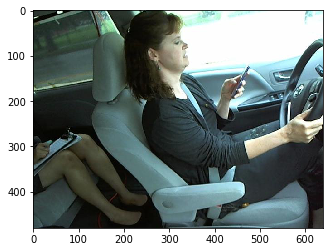

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

pic = plt.imread(image_label[13])
plt.imshow(pic)

In [50]:
import numpy as np
import pandas as pd
names = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
path = '/home/nbuser'
rows = os.listdir(path +'/test')

df = pd.DataFrame(submit_array, index=rows, columns=names)
df.to_csv('df.csv', index=False, header=False, sep=',')

In [51]:
df.to_csv

<bound method DataFrame.to_csv of                       c0        c1        c2        c3        c4        c5  \
img_50655.jpg   0.046867  0.359156  0.027148  0.111061  0.021057  0.024215   
img_1497.jpg    0.426796  0.099221  0.103928  0.020174  0.040977  0.059764   
img_86115.jpg   0.026447  0.026811  0.009574  0.486092  0.057301  0.040146   
img_47640.jpg   0.000741  0.001134  0.001997  0.000496  0.000524  0.001012   
img_28056.jpg   0.293959  0.170025  0.020771  0.029998  0.090359  0.038372   
img_34617.jpg   0.004886  0.281041  0.016368  0.008837  0.010283  0.003691   
img_94134.jpg   0.112000  0.023288  0.005082  0.024583  0.053811  0.007661   
img_42636.jpg   0.017247  0.039253  0.087100  0.004819  0.033988  0.399397   
img_10022.jpg   0.003515  0.951922  0.001802  0.011835  0.001815  0.003470   
img_68689.jpg   0.023423  0.413589  0.105755  0.013090  0.013141  0.135096   
img_36075.jpg   0.020263  0.238131  0.566001  0.005991  0.008822  0.007068   
img_83998.jpg   0.057303  0.06

In [40]:
submit_array.shape

(79726, 10)

In [41]:
path = '/home/nbuser'
column = os.listdir(path +'/test')
column

['img_50655.jpg',
 'img_1497.jpg',
 'img_86115.jpg',
 'img_47640.jpg',
 'img_28056.jpg',
 'img_34617.jpg',
 'img_94134.jpg',
 'img_42636.jpg',
 'img_10022.jpg',
 'img_68689.jpg',
 'img_36075.jpg',
 'img_83998.jpg',
 'img_51384.jpg',
 'img_19308.jpg',
 'img_93405.jpg',
 'img_5772.jpg',
 'img_35346.jpg',
 'img_43365.jpg',
 'img_8607.jpg',
 'img_12198.jpg',
 'img_31782.jpg',
 'img_54219.jpg',
 'img_15744.jpg',
 'img_99856.jpg',
 'img_67242.jpg',
 'img_59223.jpg',
 'img_23763.jpg',
 'img_62238.jpg',
 'img_75261.jpg',
 'img_90570.jpg',
 'img_9336.jpg',
 'img_61509.jpg',
 'img_74532.jpg',
 'img_11469.jpg',
 'img_82551.jpg',
 'img_44418.jpg',
 'img_57441.jpg',
 'img_60456.jpg',
 'img_13962.jpg',
 'img_52437.jpg',
 'img_65460.jpg',
 'img_49422.jpg',
 'img_45147.jpg',
 'img_51708.jpg',
 'img_64731.jpg',
 'img_58170.jpg',
 'img_61185.jpg',
 'img_93799.jpg',
 'img_29109.jpg',
 'img_14691.jpg',
 'img_53166.jpg',
 'img_72750.jpg',
 'img_56712.jpg',
 'img_77043.jpg',
 'img_80058.jpg',
 'img_91623.jp